In [20]:
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d

In [21]:
### state 
## ------------------params to modify-------------------------- ##
# -------------system----------------
L = 4 # length of the lattice
dim = 2 # dimension of the lattice

T_min, T_max = 0.1, 5.1
dT = 0.1
nt = 1 + np.int64(np.round(np.round((T_max-T_min) / dT)))
T = np.linspace(T_min, T_max, nt)
T = np.round(T, 2)

eqSteps = 10**5 # mixing time
mcSteps = 10**6 # MC steps = number of samples
sampling_interval = 10 # sampling interval

time_mcmc = np.load(f'../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/state/time.npy')
time_mcmc

array([747.41441611])

In [22]:
I_SL = np.load('./boltzmann/I_SL.npy')
T_SL = np.load('./boltzmann/T_SL.npy')
I_LBC = np.load('./boltzmann/I_LBC.npy')
T_LBC = np.load('./boltzmann/T_LBC.npy')
I_PBM = np.load('./boltzmann/I_PBM.npy')
T_PBM = np.load('./boltzmann/T_PBM.npy')

In [23]:
torch.cuda.empty_cache()

In [24]:
# def mse function 
def mse(x, y):
    return np.square(x - y).mean()

In [25]:
plt.rcParams['font.size'] = 16  # You can adjust this size as needed
plt.rcParams['lines.linewidth'] = 3  # For line plots
plt.rcParams['scatter.marker'] = 'o'  # Default marker for scatter plots
plt.rcParams['scatter.edgecolors'] = 'face'  # Ensure marker edge color matches face color

def custom_scatter(*args, **kwargs):
    kwargs.setdefault('s', 5)
    kwargs.setdefault('alpha', 0.5)
    return plt.scatter(*args, **kwargs)

# Replace the default scatter with the custom scatter
plt.scatter = custom_scatter

# 1. Error vs. Size of Training Set

## 1.1 energy

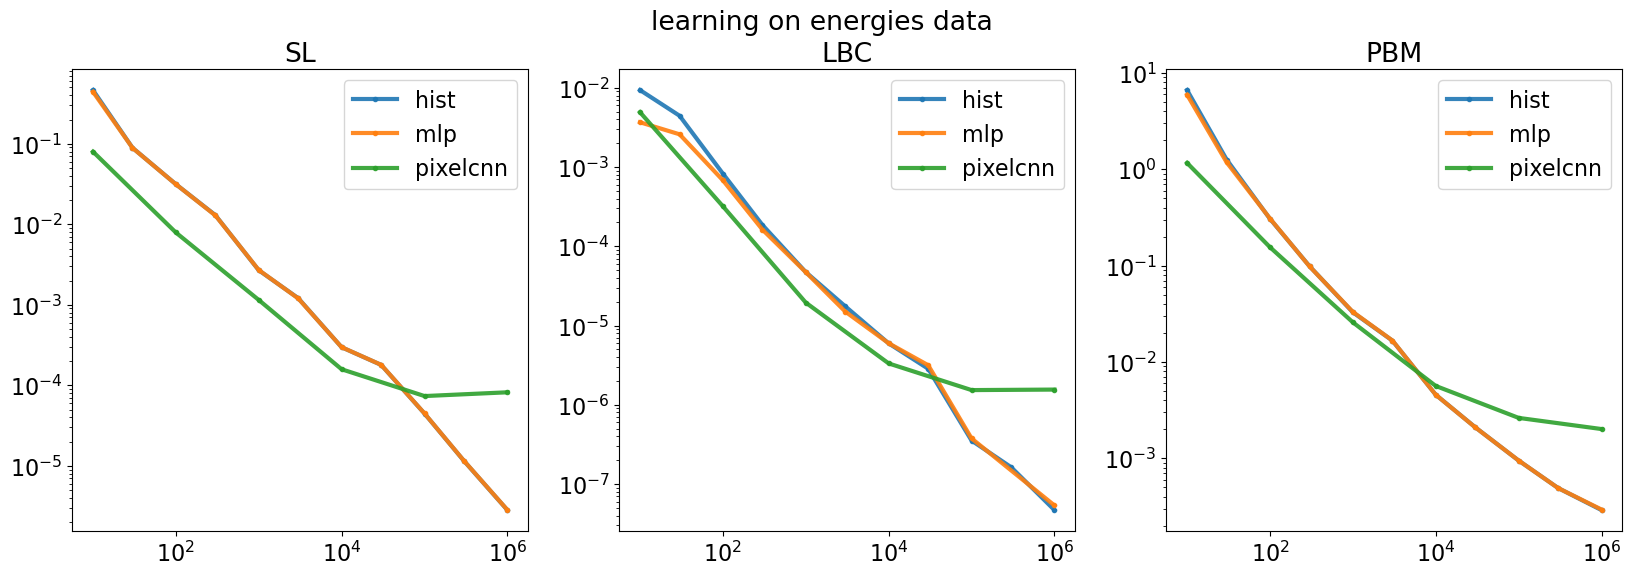

In [26]:
## ------------------params to modify-------------------------- ##
# -------------system----------------
L = 4 # length of the lattice
dim = 2 # dimension of the lattice

T_min, T_max = 0.1, 5.1
dT = 0.1
nt = 1 + np.int64(np.round(np.round((T_max-T_min) / dT)))
T = np.linspace(T_min, T_max, nt)
T = np.round(T, 2)

eqSteps = 10**5 # mixing time
mcSteps = 10**6 # MC steps = number of samples
sampling_interval = 10 # sampling interval

# -------------other params----------------
# epsilon = 1e-8 # epsilon for numerical stability
device = "cuda" if torch.cuda.is_available() else "cpu"

fig, axs = plt.subplots(1,3,figsize = (20,6))
fig.suptitle("learning on energies data")

I_SL = np.load('./boltzmann/I_SL.npy')
T_SL = np.load('./boltzmann/T_SL.npy')

# histogram binning
mses_hist = []
num_samples_list_hist = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5,10**6]
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_SL_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_SL_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_SL_hist = np.load(hist_path_indicator)
        T_SL_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_SL, I_SL_hist)])

mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 1000
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_SL_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_SL_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_SL_disc = np.load(disc_path_indicator)
        T_SL_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_SL, I_SL_disc)])

mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_SL_epochs=10000_ar=0.998.npy')


axs[0].plot(num_samples_list_hist, mses_hist, label='hist', marker='.', alpha = 0.9)
axs[0].plot(num_samples_list_disc, mses_disc, label='mlp', marker='.', alpha = 0.9)
axs[0].plot(num_samples_list_gen, mses_gen, label='pixelcnn', marker='.', alpha = 0.9)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_title("SL")
axs[0].legend()


I_LBC = np.load('./boltzmann/I_LBC.npy')
T_LBC = np.load('./boltzmann/T_LBC.npy')

# histogram binning
mses_hist = []
num_samples_list_hist = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5,10**6]
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_LBC_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_LBC_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_LBC_hist = np.load(hist_path_indicator)
        T_LBC_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_LBC, I_LBC_hist)])

mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs = 100
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_LBC_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_LBC_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_LBC_disc = np.load(disc_path_indicator)
        T_LBC_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_LBC, I_LBC_disc)])
        
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_LBC_epochs=10000_ar=0.998.npy')

axs[1].plot(num_samples_list_hist, mses_hist, label='hist', marker='.', alpha = 0.9)
axs[1].plot(num_samples_list_disc, mses_disc, label='mlp', marker='.', alpha = 0.9)
axs[1].plot(num_samples_list_gen, mses_gen, label='pixelcnn', marker='.', alpha = 0.9)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title("LBC")
axs[1].legend()

I_PBM = np.load('./boltzmann/I_PBM.npy')
T_PBM = np.load('./boltzmann/T_PBM.npy')
# histogram binning
mses_hist = []
num_samples_list_hist = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5,10**6]
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_PBM_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_PBM_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_PBM_hist = np.load(hist_path_indicator)
        T_PBM_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_PBM, I_PBM_hist)])

mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 100
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_PBM_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_PBM_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_PBM_disc = np.load(disc_path_indicator)
        T_PBM_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_PBM, I_PBM_disc)])
        
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_PBM_epochs=10000_ar=0.998.npy')


axs[2].plot(num_samples_list_hist, mses_hist, label='hist', marker='.', alpha = 0.9)
axs[2].plot(num_samples_list_disc, mses_disc, label='mlp', marker='.', alpha = 0.9)
axs[2].plot(num_samples_list_gen, mses_gen, label='pixelcnn', marker='.', alpha = 0.9)
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_title("PBM")
axs[2].legend()
# plt.savefig('EnergyData_ErrorVsDataNumber.png')
plt.show()

## 1.2 state

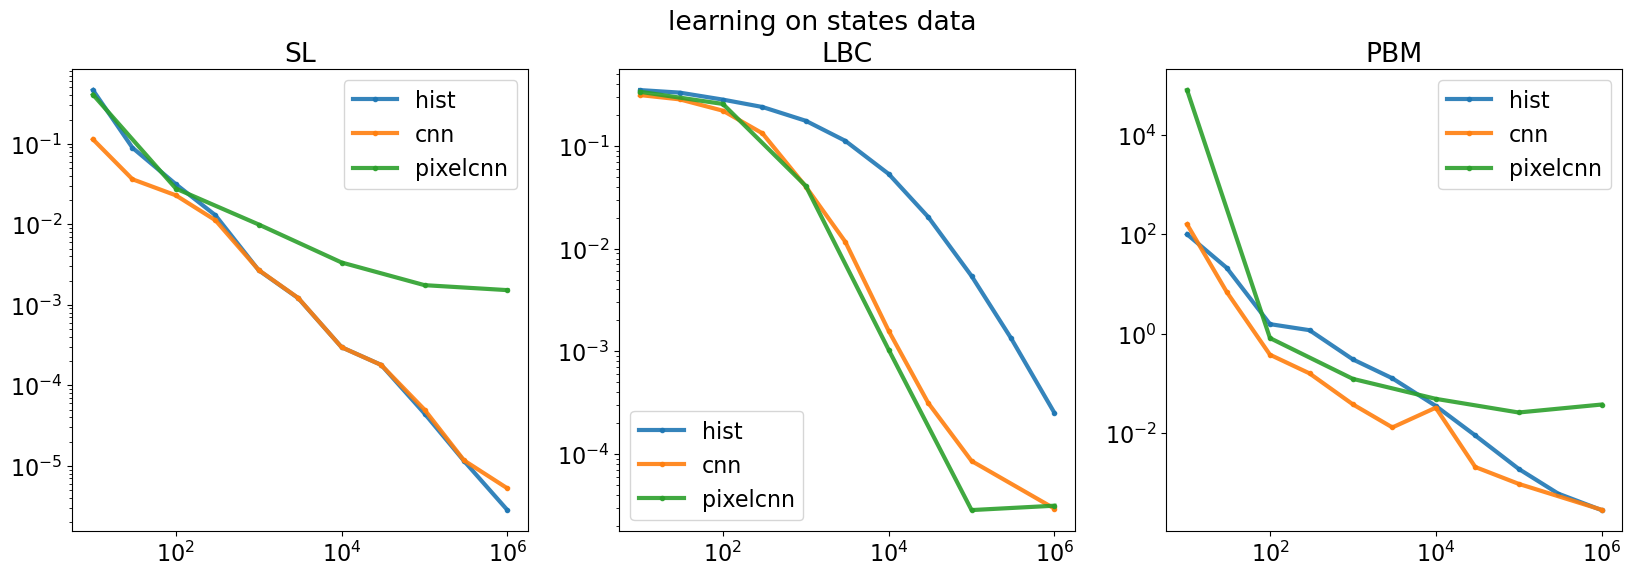

In [27]:
## ------------------params to modify-------------------------- ##
# -------------system----------------
L = 4 # length of the lattice
dim = 2 # dimension of the lattice

T_min, T_max = 0.1, 5.1
dT = 0.1
nt = 1 + np.int64(np.round(np.round((T_max-T_min) / dT)))
T = np.linspace(T_min, T_max, nt)
T = np.round(T, 2)

eqSteps = 10**5 # mixing time
mcSteps = 10**6 # MC steps = number of samples
sampling_interval = 10 # sampling interval

# -------------other params----------------
# epsilon = 1e-8 # epsilon for numerical stability
device = "cuda" if torch.cuda.is_available() else "cpu"
# device = "cpu"
## -------------dataset size---------------- ##
num_samples = 10**3 # number of training data
batch_size = 64 if num_samples > 100 else num_samples


fig, axs = plt.subplots(1,3,figsize = (20,6))
fig.suptitle("learning on states data")

I_SL = np.load('./boltzmann/I_SL.npy')
T_SL = np.load('./boltzmann/T_SL.npy')

# generative models - states data - forward KL div loss
mses_gen = []

mode = 'best'

num_samples_list_gen = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
epochs_list = [10**5, 10**5, 10**4, 10**3, 10**2, 10**1]
lr = 1e-3
for num_samples, epochs in zip(num_samples_list_gen, epochs_list):
    gen_path_indicator = f"./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_SL_numsamples={num_samples}.npy"
    if os.path.exists(gen_path_indicator):
        # print(f"loading: gen SL --- num_samples={num_samples}, epochs={epochs} --- ")
        I_SL_gen = np.load(gen_path_indicator)
        mses_gen.append([mse(I_SL, I_SL_gen)])

# histogram binning
mses_hist = []
num_samples_list_hist = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5,10**6]
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_SL_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_SL_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_SL_hist = np.load(hist_path_indicator)
        T_SL_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_SL, I_SL_hist)])

mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 100
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_SL_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_SL_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: disc SL --- num_samples={num_samples}, epochs={epochs} --- ")
        I_SL_disc = np.load(disc_path_indicator)
        T_SL_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_SL, I_SL_disc)])


axs[0].plot(num_samples_list_hist, mses_hist, label='hist', marker='.', alpha = 0.9)
axs[0].plot(num_samples_list_disc, mses_disc, label='cnn', marker='.', alpha = 0.9)
axs[0].plot(num_samples_list_gen, mses_gen, label='pixelcnn', marker='.', alpha = 0.9)
axs[0].set_title("SL")
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()

I_LBC = np.load('./boltzmann/I_LBC.npy')
T_LBC = np.load('./boltzmann/T_LBC.npy')

# generative models - states data - forward KL div loss
mses_gen = []

mode = 'best'

num_samples_list_gen = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
epochs_list = [10**5, 10**5, 10**4, 10**3, 10**2, 10**1]
lr = 1e-3
for num_samples, epochs in zip(num_samples_list_gen, epochs_list):
    gen_path_indicator = f"./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_LBC_numsamples={num_samples}.npy"
    if os.path.exists(gen_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_LBC_gen = np.load(gen_path_indicator)
        mses_gen.append([mse(I_LBC, I_LBC_gen)])


# histogram binning
mses_hist = []
num_samples_list_hist = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_LBC_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_LBC_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_LBC_hist = np.load(hist_path_indicator)
        T_LBC_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_LBC, I_LBC_hist)])

mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs_list = [100,100,100,100,100,100,100,100,100,10]
lr=1e-3
for num_samples, epochs in zip(num_samples_list_disc, epochs_list):
    disc_path_indicator = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_LBC_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_LBC_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_LBC_disc = np.load(disc_path_indicator)
        T_LBC_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_LBC, I_LBC_disc)])

axs[1].plot(num_samples_list_hist, mses_hist, label='hist', marker='.', alpha = 0.9)
axs[1].plot(num_samples_list_disc, mses_disc, label='cnn', marker='.', alpha = 0.9)
axs[1].plot(num_samples_list_gen, mses_gen, label='pixelcnn', marker='.', alpha = 0.9)
axs[1].set_title("LBC")
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()

I_PBM = np.load('./boltzmann/I_PBM.npy')
T_PBM = np.load('./boltzmann/T_PBM.npy')

# generative models - states data - forward KL div loss
mses_gen = []

mode = 'best'

num_samples_list_gen = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
epochs_list = [10**5, 10**5, 10**4, 10**3, 10**2, 10**1]
lr = 1e-3
for num_samples, epochs in zip(num_samples_list_gen, epochs_list):
    gen_path_indicator = f"./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_PBM_numsamples={num_samples}.npy"
    if os.path.exists(gen_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_PBM_gen = np.load(gen_path_indicator)
        mses_gen.append([mse(I_PBM, I_PBM_gen)])

# histogram binning
mses_hist = []
num_samples_list_hist = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_PBM_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_PBM_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_PBM_hist = np.load(hist_path_indicator)
        T_PBM_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_PBM, I_PBM_hist)])

mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs_list = [100,100,100,100,100,100,100,100,100,100]
lr=1e-3
for num_samples, epochs in zip(num_samples_list_disc, epochs_list):
    disc_path_indicator = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_PBM_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_PBM_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_PBM_disc = np.load(disc_path_indicator)
        T_PBM_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_PBM, I_PBM_disc)])
  
axs[2].plot(num_samples_list_hist, mses_hist, label='hist', marker='.', alpha = 0.9)
axs[2].plot(num_samples_list_disc, mses_disc, label='cnn', marker='.', alpha = 0.9)
axs[2].plot(num_samples_list_gen, mses_gen, label='pixelcnn', marker='.', alpha = 0.9)
axs[2].set_title("PBM")
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()

# plt.savefig('StateData_ErrorVsDataNumber.png')
plt.show()

# 2. Error vs. Training Time

## 2.1 state + MCMC Time

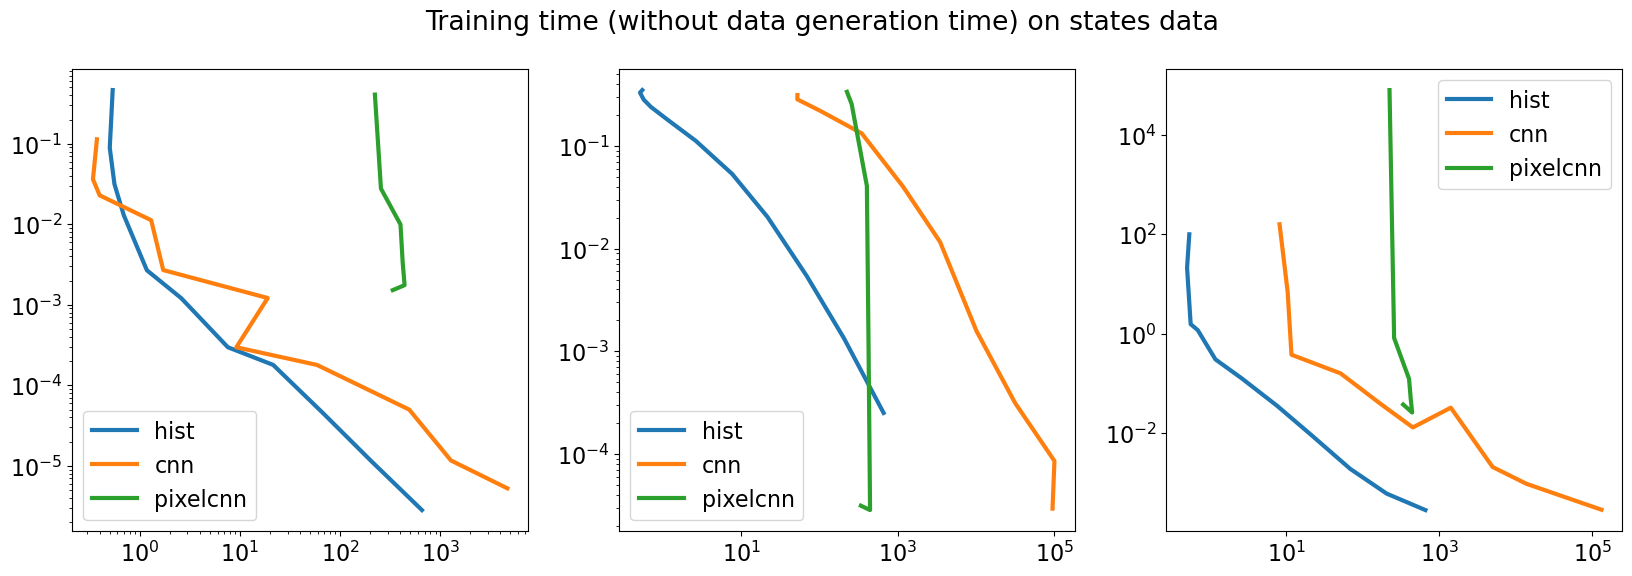

In [28]:
### state 
## ------------------params to modify-------------------------- ##
# -------------system----------------
L = 4 # length of the lattice
dim = 2 # dimension of the lattice

T_min, T_max = 0.1, 5.1
dT = 0.1
nt = 1 + np.int64(np.round(np.round((T_max-T_min) / dT)))
T = np.linspace(T_min, T_max, nt)
T = np.round(T, 2)

eqSteps = 10**5 # mixing time
mcSteps = 10**6 # MC steps = number of samples
sampling_interval = 10 # sampling interval

# -------------other params----------------
# epsilon = 1e-8 # epsilon for numerical stability
device = "cuda" if torch.cuda.is_available() else "cpu"

fig, axs= plt.subplots(1,3, figsize=(20,6))
fig.suptitle("Training time (without data generation time) on states data")
### SL
## HIST
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/state"
num_samples_list_hist = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
time_hist = np.zeros_like(num_samples_list_hist, dtype=np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy")

mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_SL_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_SL_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_SL_hist = np.load(hist_path_indicator)
        T_SL_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_SL, I_SL_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 100
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_SL_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_SL_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_SL_disc = np.load(disc_path_indicator)
        T_SL_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_SL, I_SL_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/SL_bestepoch.npy")
    times = np.load(f"../model/discrim/s/time/SL/time_numsamples={num_samples}_epochs=10.npy")
    time_disc[i] = (times / 10) * best_epoch

## GEN
mses_gen = []
mode = 'best'
num_samples_list_gen = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
epochs_list = [10**5, 10**5, 10**4, 10**3, 10**2, 10**1]
lr = 1e-3
for num_samples, epochs in zip(num_samples_list_gen, epochs_list):
    gen_path_indicator = f"./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_SL_numsamples={num_samples}.npy"
    if os.path.exists(gen_path_indicator):
        # print(f"loading: gen SL --- num_samples={num_samples}, epochs={epochs} --- ")
        I_SL_gen = np.load(gen_path_indicator)
        mses_gen.append([mse(I_SL, I_SL_gen)])
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = epochs_list[i]
    best_epoch = np.load(f'./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/numsamples={num_samples}_sum_best_epoch.npy')
    times = np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10 / 51) * best_epoch
  
axs[0].plot(time_hist, mses_hist, label = 'hist')
axs[0].plot(time_disc, mses_disc, label = 'cnn')
axs[0].plot(time_gen, mses_gen, label = 'pixelcnn')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()

### LBC
## HIST
mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_LBC_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_LBC_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_LBC_hist = np.load(hist_path_indicator)
        T_LBC_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_LBC, I_LBC_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs_list = [100,100,100,100,100,100,100,100,100,10]
lr=1e-3
for num_samples, epochs in zip(num_samples_list_disc, epochs_list):
    disc_path_indicator = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_LBC_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_LBC_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_LBC_disc = np.load(disc_path_indicator)
        T_LBC_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_LBC, I_LBC_disc)])

time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    epochs = epochs_list[i]
    best_epoch = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/LBC_bestepoch.npy")
    times = np.load(f"../model/discrim/s/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_disc[i] = (times / 10) * best_epoch * 51

## GEN
mses_gen = []
mode = 'best'
num_samples_list_gen = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
epochs_list = [10**5, 10**5, 10**4, 10**3, 10**2, 10**1]
lr = 1e-3
for num_samples, epochs in zip(num_samples_list_gen, epochs_list):
    gen_path_indicator = f"./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_LBC_numsamples={num_samples}.npy"
    if os.path.exists(gen_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_LBC_gen = np.load(gen_path_indicator)
        mses_gen.append([mse(I_LBC, I_LBC_gen)])
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = epochs_list[i]
    best_epoch = np.load(f'./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/numsamples={num_samples}_sum_best_epoch.npy')
    times = np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10 / 51) * best_epoch


axs[1].plot(time_hist, mses_hist, label = 'hist')
axs[1].plot(time_disc, mses_disc, label = 'cnn')
axs[1].plot(time_gen, mses_gen, label = 'pixelcnn')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()

### PBM
## HIST
mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_PBM_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_PBM_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_PBM_hist = np.load(hist_path_indicator)
        T_PBM_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_PBM, I_PBM_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs_list = [100,100,100,100,100,100,100,100,100,100]
lr=1e-3
for num_samples, epochs in zip(num_samples_list_disc, epochs_list):
    disc_path_indicator = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_PBM_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_PBM_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_PBM_disc = np.load(disc_path_indicator)
        T_PBM_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_PBM, I_PBM_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/PBM_bestepoch.npy")
    times = np.load(f"../model/discrim/s/time/PBM/time_numsamples={num_samples}_epochs=10.npy")
    time_disc[i] = (times / 10) * best_epoch

## GEN
mses_gen = []
mode = 'best'
num_samples_list_gen = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
epochs_list = [10**5, 10**5, 10**4, 10**3, 10**2, 10**1]
lr = 1e-3
for num_samples, epochs in zip(num_samples_list_gen, epochs_list):
    gen_path_indicator = f"./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_PBM_numsamples={num_samples}.npy"
    if os.path.exists(gen_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_PBM_gen = np.load(gen_path_indicator)
        mses_gen.append([mse(I_PBM, I_PBM_gen)])
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = epochs_list[i]
    best_epoch = np.load(f'./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/numsamples={num_samples}_sum_best_epoch.npy')
    times = np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10 / 51) * best_epoch

axs[2].plot(time_hist, mses_hist, label = 'hist')
axs[2].plot(time_disc, mses_disc, label = 'cnn')
axs[2].plot(time_gen, mses_gen, label = 'pixelcnn')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()

plt.show()


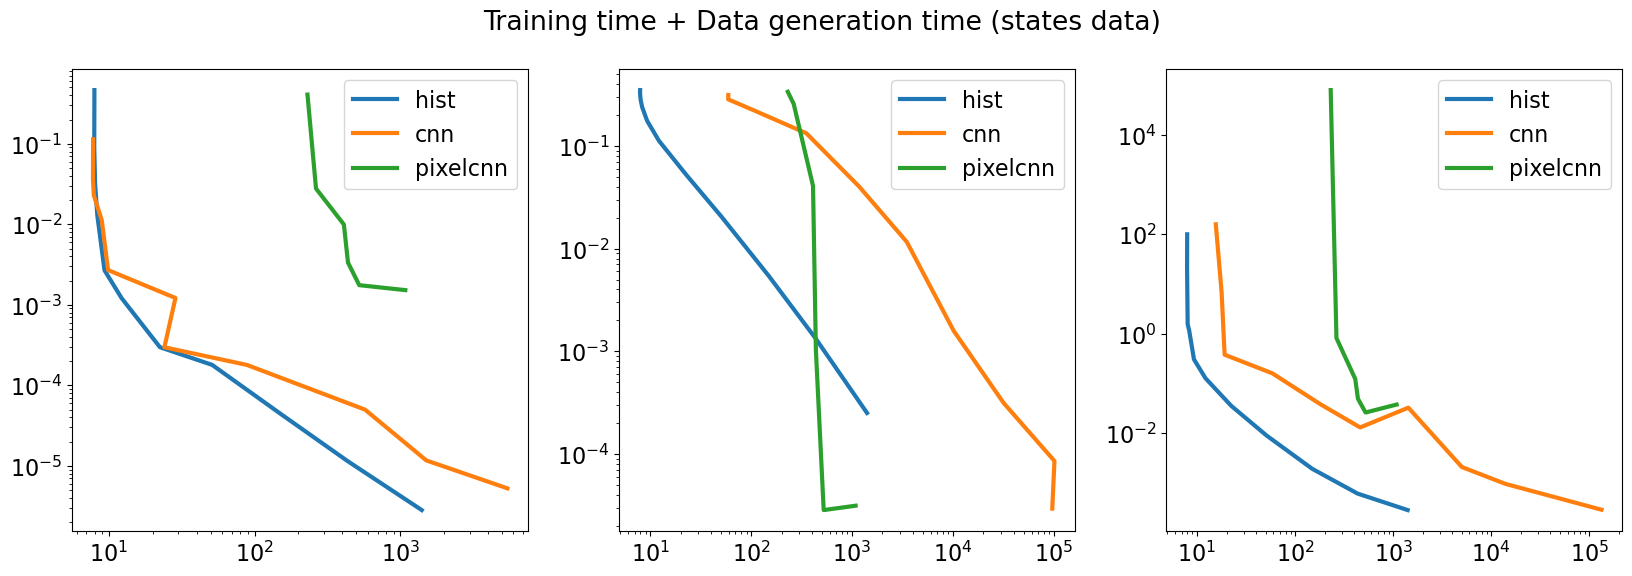

In [29]:
### state 
## ------------------params to modify-------------------------- ##
# -------------system----------------
L = 4 # length of the lattice
dim = 2 # dimension of the lattice

T_min, T_max = 0.1, 5.1
dT = 0.1
nt = 1 + np.int64(np.round(np.round((T_max-T_min) / dT)))
T = np.linspace(T_min, T_max, nt)
T = np.round(T, 2)

eqSteps = 10**5 # mixing time
mcSteps = 10**6 # MC steps = number of samples
sampling_interval = 10 # sampling interval

time_mcmc = np.load(f'../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/state/time.npy')
# -------------other params----------------
# epsilon = 1e-8 # epsilon for numerical stability
device = "cuda" if torch.cuda.is_available() else "cpu"

fig, axs= plt.subplots(1,3, figsize=(20,6))
fig.suptitle("Training time + Data generation time (states data)")
### SL
## HIST
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/state"
num_samples_list_hist = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
time_hist = np.zeros_like(num_samples_list_hist, dtype=np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy")

mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_SL_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_SL_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_SL_hist = np.load(hist_path_indicator)
        T_SL_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_SL, I_SL_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 100
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_SL_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_SL_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_SL_disc = np.load(disc_path_indicator)
        T_SL_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_SL, I_SL_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/SL_bestepoch.npy")
    times = np.load(f"../model/discrim/s/time/SL/time_numsamples={num_samples}_epochs=10.npy")
    time_disc[i] = (times / 10) * best_epoch

## GEN
mses_gen = []
mode = 'best'
num_samples_list_gen = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
epochs_list = [10**5, 10**5, 10**4, 10**3, 10**2, 10**1]
lr = 1e-3
for num_samples, epochs in zip(num_samples_list_gen, epochs_list):
    gen_path_indicator = f"./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_SL_numsamples={num_samples}.npy"
    if os.path.exists(gen_path_indicator):
        # print(f"loading: gen SL --- num_samples={num_samples}, epochs={epochs} --- ")
        I_SL_gen = np.load(gen_path_indicator)
        mses_gen.append([mse(I_SL, I_SL_gen)])
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = epochs_list[i]
    best_epoch = np.load(f'./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/numsamples={num_samples}_sum_best_epoch.npy')
    times = np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10 / 51) * best_epoch
  
axs[0].plot(time_hist + time_mcmc * (np.array(num_samples_list_hist) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_hist, label = 'hist')
axs[0].plot(time_disc + time_mcmc * (np.array(num_samples_list_disc) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_disc, label = 'cnn')
axs[0].plot(time_gen + time_mcmc * (np.array(num_samples_list_gen) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_gen, label = 'pixelcnn')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()

### LBC
## HIST
mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_LBC_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_LBC_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_LBC_hist = np.load(hist_path_indicator)
        T_LBC_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_LBC, I_LBC_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs_list = [100,100,100,100,100,100,100,100,100,10]
lr=1e-3
for num_samples, epochs in zip(num_samples_list_disc, epochs_list):
    disc_path_indicator = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_LBC_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_LBC_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_LBC_disc = np.load(disc_path_indicator)
        T_LBC_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_LBC, I_LBC_disc)])

time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    epochs = epochs_list[i]
    best_epoch = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/LBC_bestepoch.npy")
    times = np.load(f"../model/discrim/s/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_disc[i] = (times / 10) * best_epoch * 51

## GEN
mses_gen = []
mode = 'best'
num_samples_list_gen = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
epochs_list = [10**5, 10**5, 10**4, 10**3, 10**2, 10**1]
lr = 1e-3
for num_samples, epochs in zip(num_samples_list_gen, epochs_list):
    gen_path_indicator = f"./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_LBC_numsamples={num_samples}.npy"
    if os.path.exists(gen_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_LBC_gen = np.load(gen_path_indicator)
        mses_gen.append([mse(I_LBC, I_LBC_gen)])
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = epochs_list[i]
    best_epoch = np.load(f'./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/numsamples={num_samples}_sum_best_epoch.npy')
    times = np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10 / 51) * best_epoch


axs[1].plot(time_hist + time_mcmc * (np.array(num_samples_list_hist) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_hist, label = 'hist')
axs[1].plot(time_disc + time_mcmc * (np.array(num_samples_list_disc) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_disc, label = 'cnn')
axs[1].plot(time_gen + time_mcmc * (np.array(num_samples_list_gen) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_gen, label = 'pixelcnn')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()

### PBM
## HIST
mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_PBM_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_PBM_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_PBM_hist = np.load(hist_path_indicator)
        T_PBM_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_PBM, I_PBM_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs_list = [100,100,100,100,100,100,100,100,100,100]
lr=1e-3
for num_samples, epochs in zip(num_samples_list_disc, epochs_list):
    disc_path_indicator = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_PBM_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_PBM_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_PBM_disc = np.load(disc_path_indicator)
        T_PBM_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_PBM, I_PBM_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/PBM_bestepoch.npy")
    times = np.load(f"../model/discrim/s/time/PBM/time_numsamples={num_samples}_epochs=10.npy")
    time_disc[i] = (times / 10) * best_epoch

## GEN
mses_gen = []
mode = 'best'
num_samples_list_gen = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
epochs_list = [10**5, 10**5, 10**4, 10**3, 10**2, 10**1]
lr = 1e-3
for num_samples, epochs in zip(num_samples_list_gen, epochs_list):
    gen_path_indicator = f"./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_PBM_numsamples={num_samples}.npy"
    if os.path.exists(gen_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_PBM_gen = np.load(gen_path_indicator)
        mses_gen.append([mse(I_PBM, I_PBM_gen)])
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = epochs_list[i]
    best_epoch = np.load(f'./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/numsamples={num_samples}_sum_best_epoch.npy')
    times = np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10 / 51) * best_epoch

axs[2].plot(time_hist + time_mcmc * (np.array(num_samples_list_hist) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_hist, label = 'hist')
axs[2].plot(time_disc + time_mcmc * (np.array(num_samples_list_disc) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_disc, label = 'cnn')
axs[2].plot(time_gen + time_mcmc * (np.array(num_samples_list_gen) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_gen, label = 'pixelcnn')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()

plt.show()

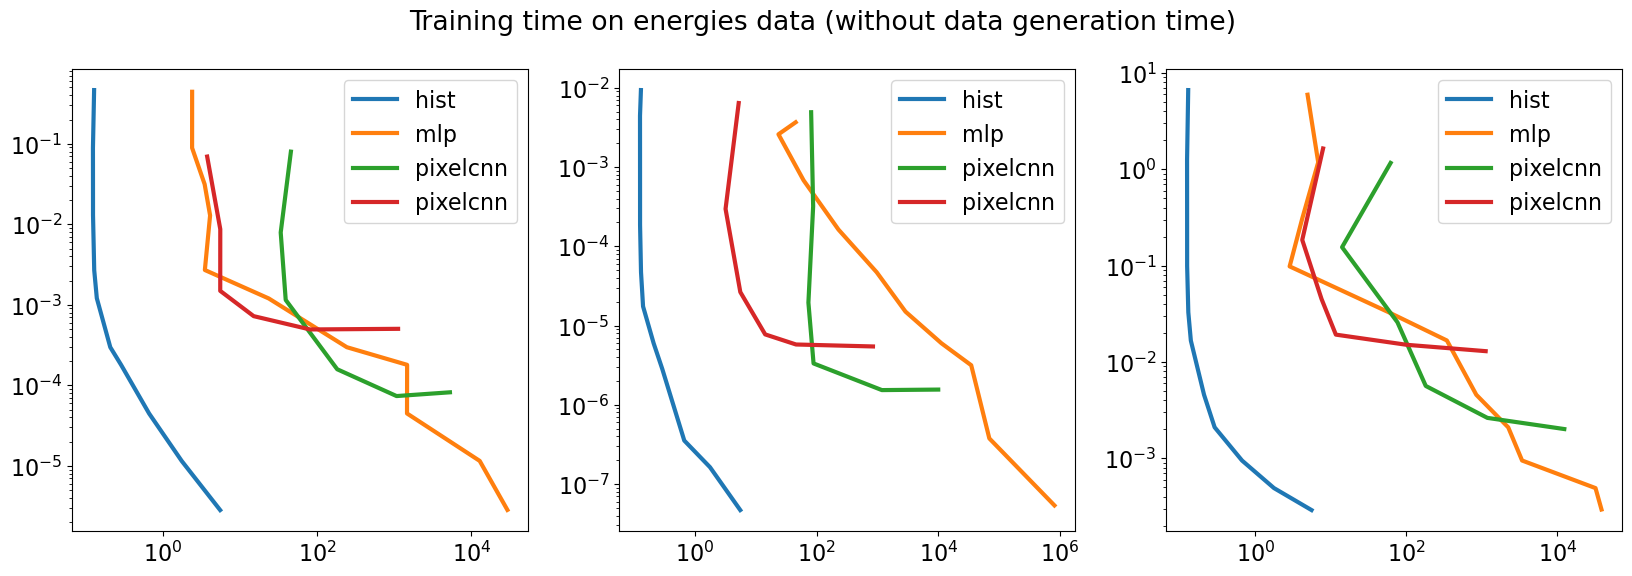

In [30]:
### state 
## ------------------params to modify-------------------------- ##
# -------------system----------------
L = 4 # length of the lattice
dim = 2 # dimension of the lattice

T_min, T_max = 0.1, 5.1
dT = 0.1
nt = 1 + np.int64(np.round(np.round((T_max-T_min) / dT)))
T = np.linspace(T_min, T_max, nt)
T = np.round(T, 2)

eqSteps = 10**5 # mixing time
mcSteps = 10**6 # MC steps = number of samples
sampling_interval = 10 # sampling interval

# -------------other params----------------
# epsilon = 1e-8 # epsilon for numerical stability
device = "cuda" if torch.cuda.is_available() else "cpu"

fig, axs= plt.subplots(1,3, figsize=(20,6))
fig.suptitle("Training time on energies data (without data generation time)")
### SL
## HIST
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/energy"
num_samples_list_hist = np.array([10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6])
time_hist = np.ones_like(num_samples_list_hist, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy")

mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_SL_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_SL_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_SL_hist = np.load(hist_path_indicator)
        T_SL_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_SL, I_SL_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 1000
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_SL_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_SL_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_SL_disc = np.load(disc_path_indicator)
        T_SL_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_SL, I_SL_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/SL_bestepoch.npy")
    times = np.load(f"../model/discrim/e/time/SL/time_numsamples={num_samples}_epochs=10.npy")
    time_disc[i] = (times / 10) * best_epoch

## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_SL_epochs=10000_ar=0.998.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_SL_epochs=10000_ar=0.998.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
    
axs[0].plot(time_hist, mses_hist, label = 'hist')
axs[0].plot(time_disc, mses_disc, label = 'mlp')
axs[0].plot(time_gen, mses_gen, label = 'pixelcnn')
## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_SL_epochs=1000_ar=0.98.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_SL_epochs=1000_ar=0.98.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
axs[0].plot(time_gen, mses_gen, label = 'pixelcnn')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()

### LBC
## HIST
mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_LBC_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_LBC_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_LBC_hist = np.load(hist_path_indicator)
        T_LBC_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_LBC, I_LBC_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs = 100
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_LBC_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_LBC_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_LBC_disc = np.load(disc_path_indicator)
        T_LBC_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_LBC, I_LBC_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/LBC_bestepoch.npy")
    times = np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_disc[i] = (times / 10) * best_epoch * 51

## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_LBC_epochs=10000_ar=0.998.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_LBC_epochs=10000_ar=0.998.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
    

axs[1].plot(time_hist, mses_hist, label = 'hist')
axs[1].plot(time_disc, mses_disc, label = 'mlp')
axs[1].plot(time_gen, mses_gen, label = 'pixelcnn')
## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_LBC_epochs=1000_ar=0.98.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_LBC_epochs=1000_ar=0.98.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
axs[1].plot(time_gen, mses_gen, label = 'pixelcnn')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()


### PBM
## HIST
mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_PBM_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_PBM_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_PBM_hist = np.load(hist_path_indicator)
        T_PBM_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_PBM, I_PBM_hist)])
## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 100
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_PBM_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_PBM_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_PBM_disc = np.load(disc_path_indicator)
        T_PBM_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_PBM, I_PBM_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/PBM_bestepoch.npy")
    times = np.load(f"../model/discrim/e/time/PBM/time_numsamples={num_samples}_epochs=10.npy")
    time_disc[i] = (times / 10) * best_epoch

## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_PBM_epochs=10000_ar=0.998.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_PBM_epochs=10000_ar=0.998.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch

axs[2].plot(time_hist, mses_hist, label = 'hist')
axs[2].plot(time_disc, mses_disc, label = 'mlp')
axs[2].plot(time_gen, mses_gen, label = 'pixelcnn')
## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_PBM_epochs=1000_ar=0.98.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_PBM_epochs=1000_ar=0.98.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
axs[2].plot(time_gen, mses_gen, label = 'pixelcnn')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()

plt.show()


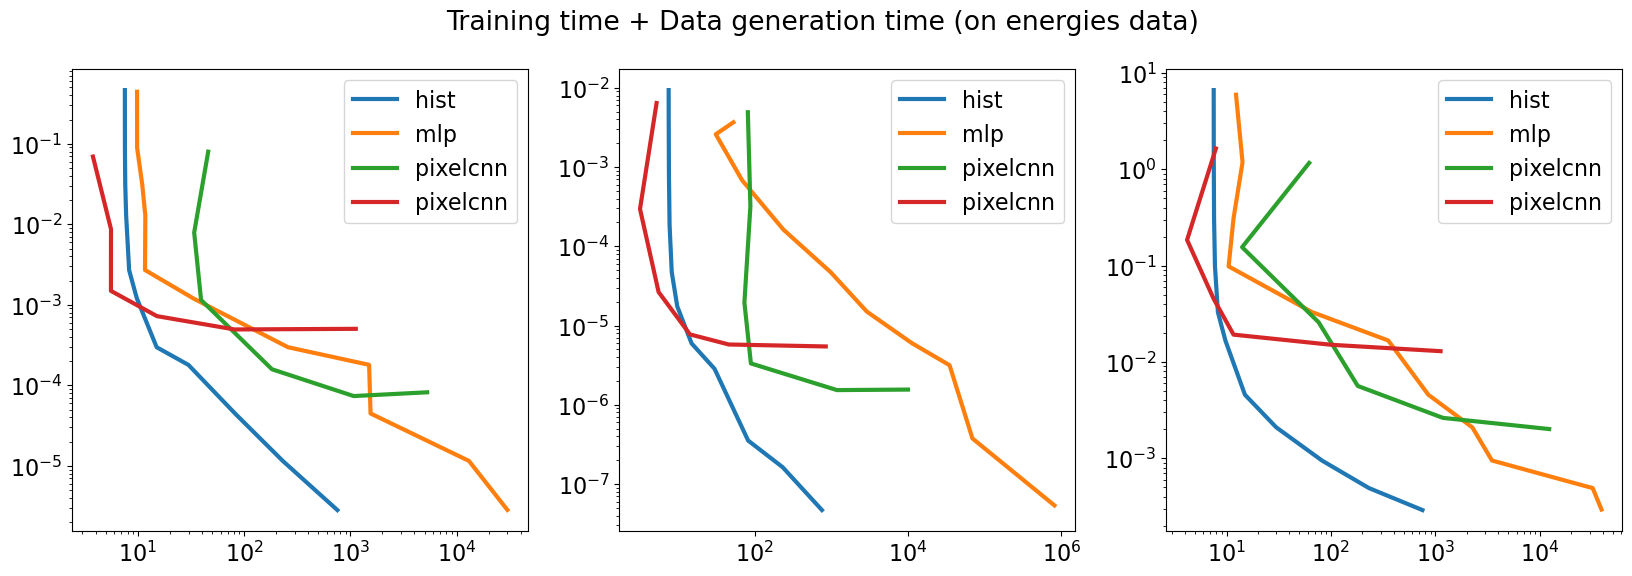

In [31]:
### state 
## ------------------params to modify-------------------------- ##
# -------------system----------------
L = 4 # length of the lattice
dim = 2 # dimension of the lattice

T_min, T_max = 0.1, 5.1
dT = 0.1
nt = 1 + np.int64(np.round(np.round((T_max-T_min) / dT)))
T = np.linspace(T_min, T_max, nt)
T = np.round(T, 2)

eqSteps = 10**5 # mixing time
mcSteps = 10**6 # MC steps = number of samples
sampling_interval = 10 # sampling interval

time_mcmc = np.load(f'../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/state/time.npy')

# -------------other params----------------
# epsilon = 1e-8 # epsilon for numerical stability
device = "cuda" if torch.cuda.is_available() else "cpu"

fig, axs= plt.subplots(1,3, figsize=(20,6))
fig.suptitle("Training time + Data generation time (on energies data)")
### SL
## HIST
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/energy"
num_samples_list_hist = np.array([10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6])
time_hist = np.ones_like(num_samples_list_hist, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy")

mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_SL_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_SL_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_SL_hist = np.load(hist_path_indicator)
        T_SL_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_SL, I_SL_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 1000
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_SL_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_SL_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_SL_disc = np.load(disc_path_indicator)
        T_SL_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_SL, I_SL_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/SL_bestepoch.npy")
    times = np.load(f"../model/discrim/e/time/SL/time_numsamples={num_samples}_epochs=10.npy")
    time_disc[i] = (times / 10) * best_epoch

## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_SL_epochs=10000_ar=0.998.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_SL_epochs=10000_ar=0.998.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
    
axs[0].plot(time_hist+ time_mcmc * (np.array(num_samples_list_hist) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_hist, label = 'hist')
axs[0].plot(time_disc+ time_mcmc * (np.array(num_samples_list_disc) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_disc, label = 'mlp')
axs[0].plot(time_gen, mses_gen, label = 'pixelcnn')
## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_SL_epochs=1000_ar=0.98.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_SL_epochs=1000_ar=0.98.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
axs[0].plot(time_gen, mses_gen, label = 'pixelcnn')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()

### LBC
## HIST
mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_LBC_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_LBC_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_LBC_hist = np.load(hist_path_indicator)
        T_LBC_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_LBC, I_LBC_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs = 100
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_LBC_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_LBC_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_LBC_disc = np.load(disc_path_indicator)
        T_LBC_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_LBC, I_LBC_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/LBC_bestepoch.npy")
    times = np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_disc[i] = (times / 10) * best_epoch * 51

## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_LBC_epochs=10000_ar=0.998.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_LBC_epochs=10000_ar=0.998.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
    

axs[1].plot(time_hist + time_mcmc * (np.array(num_samples_list_hist) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_hist, label = 'hist')
axs[1].plot(time_disc + time_mcmc * (np.array(num_samples_list_disc) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_disc, label = 'mlp')
axs[1].plot(time_gen, mses_gen, label = 'pixelcnn')
## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_LBC_epochs=1000_ar=0.98.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_LBC_epochs=1000_ar=0.98.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
axs[1].plot(time_gen, mses_gen, label = 'pixelcnn')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()


### PBM
## HIST
mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_PBM_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_PBM_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_PBM_hist = np.load(hist_path_indicator)
        T_PBM_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_PBM, I_PBM_hist)])
## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 100
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_PBM_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_PBM_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_PBM_disc = np.load(disc_path_indicator)
        T_PBM_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_PBM, I_PBM_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/PBM_bestepoch.npy")
    times = np.load(f"../model/discrim/e/time/PBM/time_numsamples={num_samples}_epochs=10.npy")
    time_disc[i] = (times / 10) * best_epoch

## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_PBM_epochs=10000_ar=0.998.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_PBM_epochs=10000_ar=0.998.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch

axs[2].plot(time_hist + time_mcmc * (np.array(num_samples_list_hist) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_hist, label = 'hist')
axs[2].plot(time_disc + time_mcmc * (np.array(num_samples_list_disc) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_disc, label = 'mlp')
axs[2].plot(time_gen, mses_gen, label = 'pixelcnn')
## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_PBM_epochs=1000_ar=0.98.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_PBM_epochs=1000_ar=0.98.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
axs[2].plot(time_gen, mses_gen, label = 'pixelcnn')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()

plt.show()

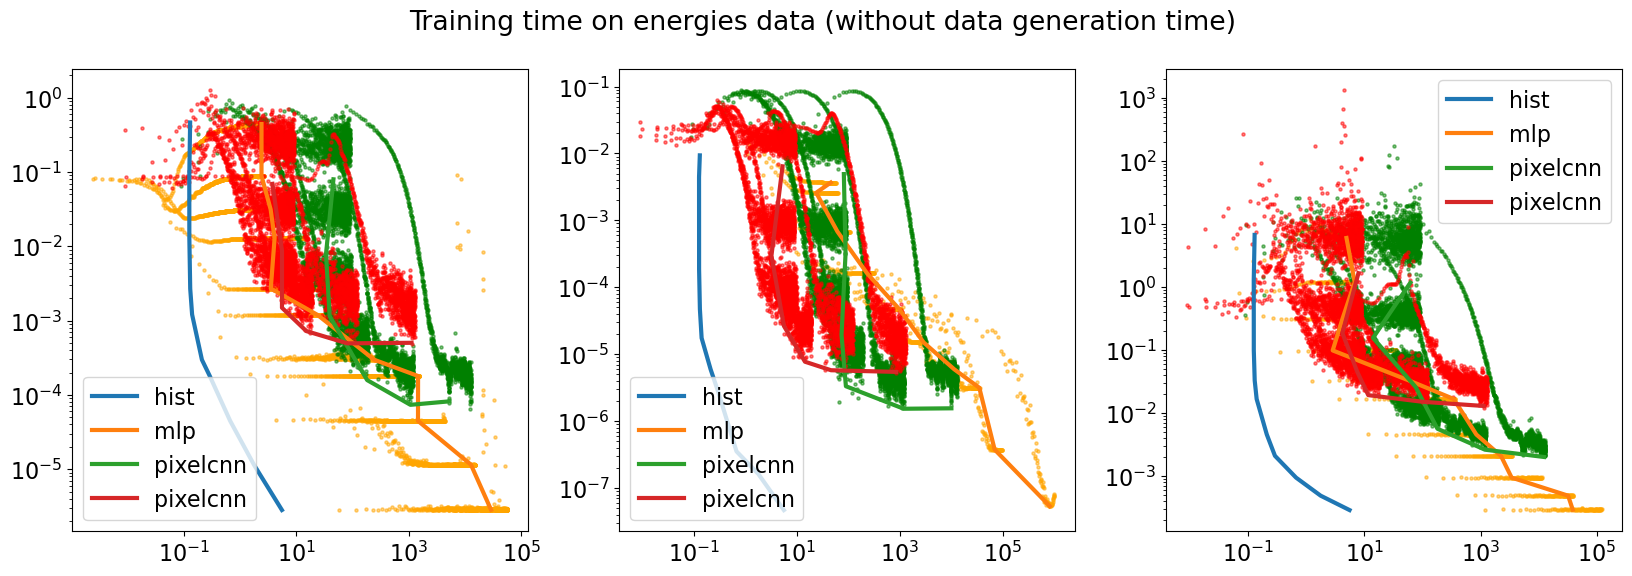

In [32]:
### energy 
## ------------------params to modify-------------------------- ##
# -------------system----------------
L = 4 # length of the lattice
dim = 2 # dimension of the lattice

T_min, T_max = 0.1, 5.1
dT = 0.1
nt = 1 + np.int64(np.round(np.round((T_max-T_min) / dT)))
T = np.linspace(T_min, T_max, nt)
T = np.round(T, 2)

eqSteps = 10**5 # mixing time
mcSteps = 10**6 # MC steps = number of samples
sampling_interval = 10 # sampling interval

# -------------other params----------------
# epsilon = 1e-8 # epsilon for numerical stability
device = "cuda" if torch.cuda.is_available() else "cpu"

fig, axs= plt.subplots(1,3, figsize=(20,6))
fig.suptitle("Training time on energies data (without data generation time)")
### SL
## HIST
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/energy"
num_samples_list_hist = np.array([10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6])
time_hist = np.ones_like(num_samples_list_hist, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy")

mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_SL_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_SL_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_SL_hist = np.load(hist_path_indicator)
        T_SL_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_SL, I_SL_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 1000
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_SL_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_SL_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_SL_disc = np.load(disc_path_indicator)
        T_SL_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_SL, I_SL_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/SL_bestepoch.npy")
    times = np.load(f"../model/discrim/e/time/SL/time_numsamples={num_samples}_epochs=10.npy")
    time_disc[i] = (times / 10) * best_epoch

## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_SL_epochs=10000_ar=0.998.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_SL_epochs=10000_ar=0.998.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
    
axs[0].plot(time_hist, mses_hist, label = 'hist')
axs[0].plot(time_disc, mses_disc, label = 'mlp')

epochs = 1000
for num_samples in num_samples_list_disc:
    mse_all_SL = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_SL.npy")
    axs[0].scatter(np.load(f"../model/discrim/e/time/SL/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'orange', alpha=0.5,s=5)
axs[0].plot(time_gen, mses_gen, label = 'pixelcnn')
## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_SL_epochs=1000_ar=0.98.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_SL_epochs=1000_ar=0.98.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
axs[0].plot(time_gen, mses_gen, label = 'pixelcnn')


mode = 'all'
epochs = 10000
ar = 0.998
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_SL = mse_all[0,:]
    axs[0].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'green', alpha=0.5,s=5)

mode = 'all'
epochs = 1000
ar = 0.98
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_SL = mse_all[0,:]
    axs[0].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'red', alpha=0.5,s=5)



axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()

### LBC
## HIST
mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_LBC_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_LBC_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_LBC_hist = np.load(hist_path_indicator)
        T_LBC_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_LBC, I_LBC_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs = 100
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_LBC_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_LBC_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_LBC_disc = np.load(disc_path_indicator)
        T_LBC_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_LBC, I_LBC_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/LBC_bestepoch.npy")
    times = np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_disc[i] = (times / 10) * best_epoch * 51

## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_LBC_epochs=10000_ar=0.998.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_LBC_epochs=10000_ar=0.998.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
    

axs[1].plot(time_hist, mses_hist, label = 'hist')
axs[1].plot(time_disc, mses_disc, label = 'mlp')

epochs = 100
for num_samples in num_samples_list_disc:
    mse_all_LBC = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_LBC.npy")
    axs[1].scatter(np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * 51 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'orange', alpha=0.5,s=5)


axs[1].plot(time_gen, mses_gen, label = 'pixelcnn')
## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_LBC_epochs=1000_ar=0.98.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_LBC_epochs=1000_ar=0.98.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
axs[1].plot(time_gen, mses_gen, label = 'pixelcnn')


mode = 'all'
epochs = 10000
ar = 0.998
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_LBC = mse_all[1,:]
    axs[1].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'green', alpha=0.5,s=5)

mode = 'all'
epochs = 1000
ar = 0.98
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_LBC = mse_all[1,:]
    axs[1].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'red' , alpha=0.5,s=5)

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()


### PBM
## HIST
mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_PBM_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_PBM_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_PBM_hist = np.load(hist_path_indicator)
        T_PBM_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_PBM, I_PBM_hist)])
## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 100
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_PBM_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_PBM_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_PBM_disc = np.load(disc_path_indicator)
        T_PBM_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_PBM, I_PBM_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/PBM_bestepoch.npy")
    times = np.load(f"../model/discrim/e/time/PBM/time_numsamples={num_samples}_epochs=10.npy")
    time_disc[i] = (times / 10) * best_epoch

## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_PBM_epochs=10000_ar=0.998.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_PBM_epochs=10000_ar=0.998.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch

axs[2].plot(time_hist, mses_hist, label = 'hist')
axs[2].plot(time_disc, mses_disc, label = 'mlp')


epochs = 100
for num_samples in num_samples_list_disc:
    mse_all_PBM = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_PBM.npy")
    axs[2].scatter(np.load(f"../model/discrim/e/time/PBM/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'orange', alpha=0.5,s=5)

axs[2].plot(time_gen, mses_gen, label = 'pixelcnn')
## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_PBM_epochs=1000_ar=0.98.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_PBM_epochs=1000_ar=0.98.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
axs[2].plot(time_gen, mses_gen, label = 'pixelcnn')

mode = 'all'
epochs = 10000
ar = 0.998
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_PBM = mse_all[2,:]
    axs[2].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'green', alpha = 0.5,s = 5)

mode = 'all'
epochs = 1000
ar = 0.98
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_PBM = mse_all[2,:]
    axs[2].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'red', alpha = 0.5,s = 5)

axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()
plt.savefig('EnergyData_ErrorVsTime(without generation time).png')
plt.show()

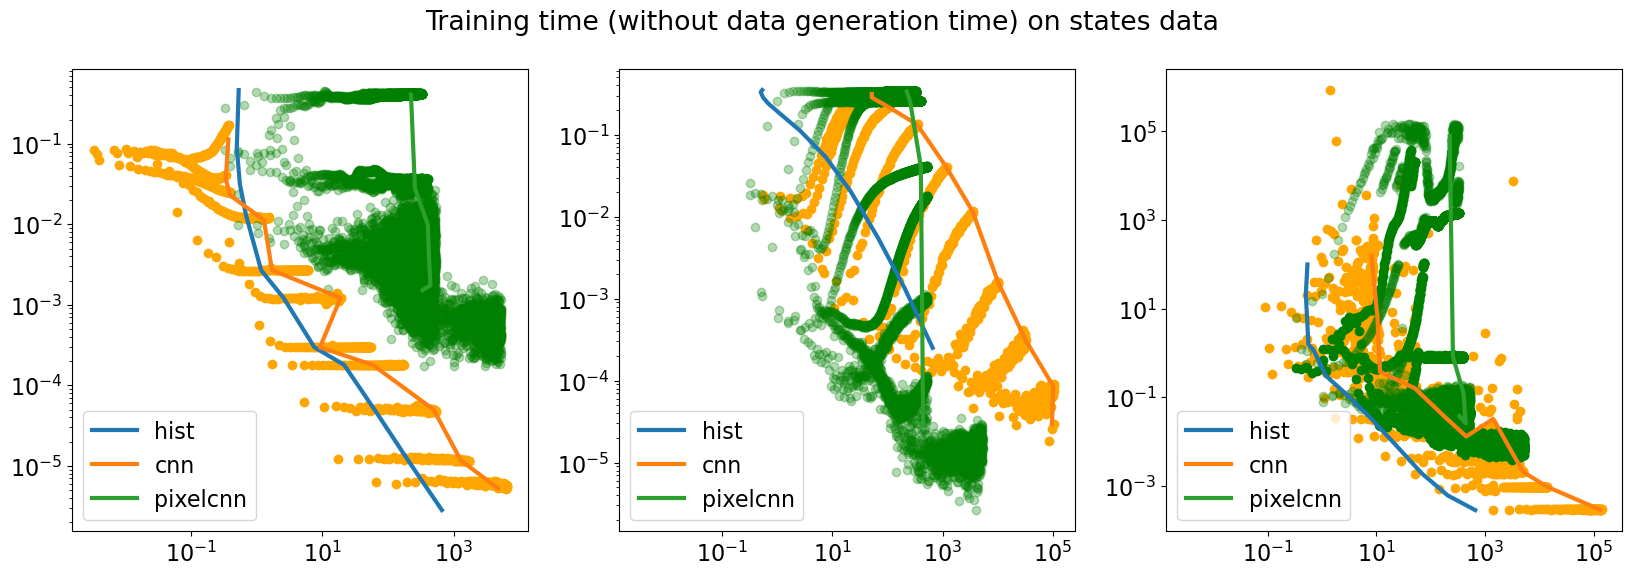

In [33]:
### state 
## ------------------params to modify-------------------------- ##
# -------------system----------------
L = 4 # length of the lattice
dim = 2 # dimension of the lattice

T_min, T_max = 0.1, 5.1
dT = 0.1
nt = 1 + np.int64(np.round(np.round((T_max-T_min) / dT)))
T = np.linspace(T_min, T_max, nt)
T = np.round(T, 2)

eqSteps = 10**5 # mixing time
mcSteps = 10**6 # MC steps = number of samples
sampling_interval = 10 # sampling interval

# -------------other params----------------
# epsilon = 1e-8 # epsilon for numerical stability
device = "cuda" if torch.cuda.is_available() else "cpu"

fig, axs= plt.subplots(1,3, figsize=(20,6))
fig.suptitle("Training time (without data generation time) on states data")
### SL
## HIST
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/state"
num_samples_list_hist = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
time_hist = np.zeros_like(num_samples_list_hist, dtype=np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy")

mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_SL_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_SL_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_SL_hist = np.load(hist_path_indicator)
        T_SL_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_SL, I_SL_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 100
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_SL_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_SL_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_SL_disc = np.load(disc_path_indicator)
        T_SL_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_SL, I_SL_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/SL_bestepoch.npy")
    times = np.load(f"../model/discrim/s/time/SL/time_numsamples={num_samples}_epochs=10.npy")
    time_disc[i] = (times / 10) * best_epoch

## GEN
mses_gen = []
mode = 'best'
num_samples_list_gen = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
epochs_list = [10**5, 10**5, 10**4, 10**3, 10**2, 10**1]
lr = 1e-3
for num_samples, epochs in zip(num_samples_list_gen, epochs_list):
    gen_path_indicator = f"./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_SL_numsamples={num_samples}.npy"
    if os.path.exists(gen_path_indicator):
        # print(f"loading: gen SL --- num_samples={num_samples}, epochs={epochs} --- ")
        I_SL_gen = np.load(gen_path_indicator)
        mses_gen.append([mse(I_SL, I_SL_gen)])
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = epochs_list[i]
    best_epoch = np.load(f'./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/numsamples={num_samples}_sum_best_epoch.npy')
    times = np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10 / 51) * best_epoch
  
axs[0].plot(time_hist, mses_hist, label = 'hist')
axs[0].plot(time_disc, mses_disc, label = 'cnn')

epochs = 100
for num_samples in num_samples_list_disc:
    mse_all_SL = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_SL.npy")
    axs[0].scatter(np.load(f"../model/discrim/s/time/SL/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'orange')

axs[0].plot(time_gen, mses_gen, label = 'pixelcnn')

mode = 'all'
lr = 1e-3
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = int(1e7/num_samples) if num_samples > 10 else 10**5
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_SL = mse_all[0,:]
    axs[0].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'green', alpha = 0.3)

mode = 'all'
lr = 1e-4
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    if num_samples == 10:
        epochs = 10**5
    elif num_samples <= 10**4:
        epochs = int(1e7 / num_samples)
    else:
        epochs = int(1e8 / num_samples)
    # epochs = int(1e7/num_samples) if num_samples > 10 else 10**5
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_SL = mse_all[0,:]
    axs[0].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'green', alpha = 0.3)


axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()

### LBC
## HIST
mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_LBC_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_LBC_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_LBC_hist = np.load(hist_path_indicator)
        T_LBC_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_LBC, I_LBC_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs_list = [100,100,100,100,100,100,100,100,100,10]
lr=1e-3
for num_samples, epochs in zip(num_samples_list_disc, epochs_list):
    disc_path_indicator = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_LBC_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_LBC_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_LBC_disc = np.load(disc_path_indicator)
        T_LBC_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_LBC, I_LBC_disc)])

time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    epochs = epochs_list[i]
    best_epoch = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/LBC_bestepoch.npy")
    times = np.load(f"../model/discrim/s/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_disc[i] = (times / 10) * best_epoch * 51

## GEN
mses_gen = []
mode = 'best'
num_samples_list_gen = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
epochs_list = [10**5, 10**5, 10**4, 10**3, 10**2, 10**1]
lr = 1e-3
for num_samples, epochs in zip(num_samples_list_gen, epochs_list):
    gen_path_indicator = f"./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_LBC_numsamples={num_samples}.npy"
    if os.path.exists(gen_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_LBC_gen = np.load(gen_path_indicator)
        mses_gen.append([mse(I_LBC, I_LBC_gen)])
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = epochs_list[i]
    best_epoch = np.load(f'./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/numsamples={num_samples}_sum_best_epoch.npy')
    times = np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10 / 51) * best_epoch


axs[1].plot(time_hist, mses_hist, label = 'hist')
axs[1].plot(time_disc, mses_disc, label = 'cnn')

for num_samples in num_samples_list_disc:
    epochs = 100 if num_samples < 10**6 else 10
    mse_all_LBC = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_LBC.npy")
    axs[1].scatter(np.load(f"../model/discrim/s/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * 51 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'orange')


axs[1].plot(time_gen, mses_gen, label = 'pixelcnn')


mode = 'all'
lr = 1e-3
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = int(1e7/num_samples) if num_samples > 10 else 10**5
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_LBC = mse_all[1,:]
    axs[1].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'green', alpha = 0.3)

mode = 'all'
lr = 1e-4
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    if num_samples == 10:
        epochs = 10**5
    elif num_samples <= 10**4:
        epochs = int(1e7 / num_samples)
    else:
        epochs = int(1e8 / num_samples)
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_LBC = mse_all[1,:]
    axs[1].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'green', alpha = 0.3)


axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()

### PBM
## HIST
mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_PBM_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_PBM_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_PBM_hist = np.load(hist_path_indicator)
        T_PBM_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_PBM, I_PBM_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs_list = [100,100,100,100,100,100,100,100,100,100]
lr=1e-3
for num_samples, epochs in zip(num_samples_list_disc, epochs_list):
    disc_path_indicator = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_PBM_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_PBM_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_PBM_disc = np.load(disc_path_indicator)
        T_PBM_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_PBM, I_PBM_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/PBM_bestepoch.npy")
    times = np.load(f"../model/discrim/s/time/PBM/time_numsamples={num_samples}_epochs=10.npy")
    time_disc[i] = (times / 10) * best_epoch

## GEN
mses_gen = []
mode = 'best'
num_samples_list_gen = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
epochs_list = [10**5, 10**5, 10**4, 10**3, 10**2, 10**1]
lr = 1e-3
for num_samples, epochs in zip(num_samples_list_gen, epochs_list):
    gen_path_indicator = f"./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_PBM_numsamples={num_samples}.npy"
    if os.path.exists(gen_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_PBM_gen = np.load(gen_path_indicator)
        mses_gen.append([mse(I_PBM, I_PBM_gen)])
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = epochs_list[i]
    best_epoch = np.load(f'./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/numsamples={num_samples}_sum_best_epoch.npy')
    times = np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10 / 51) * best_epoch

axs[2].plot(time_hist, mses_hist, label = 'hist')
axs[2].plot(time_disc, mses_disc, label = 'cnn')

epochs = 100
lr = 1e-3
for num_samples in num_samples_list_disc:
    # for num_samples in [10**1,]:
    mse_all_PBM = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_PBM.npy")
    axs[2].scatter(np.load(f"../model/discrim/s/time/PBM/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'orange')

axs[2].plot(time_gen, mses_gen, label = 'pixelcnn')


mode = 'all'
lr = 1e-3
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = int(1e7/num_samples) if num_samples > 10 else 10**5
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_PBM = mse_all[2,:]
    axs[2].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'green', alpha = 0.3)

mode = 'all'
lr = 1e-4
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    if num_samples == 10:
        epochs = 10**5
    elif num_samples <= 10**4:
        epochs = int(1e7 / num_samples)
    else:
        epochs = int(1e8 / num_samples)
    # epochs = int(1e7/num_samples) if num_samples > 10 else 10**5
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_PBM = mse_all[2,:]
    axs[2].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'green')

axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()
plt.savefig('StateData_ErrorVsTime(without generation time).png')
plt.show()


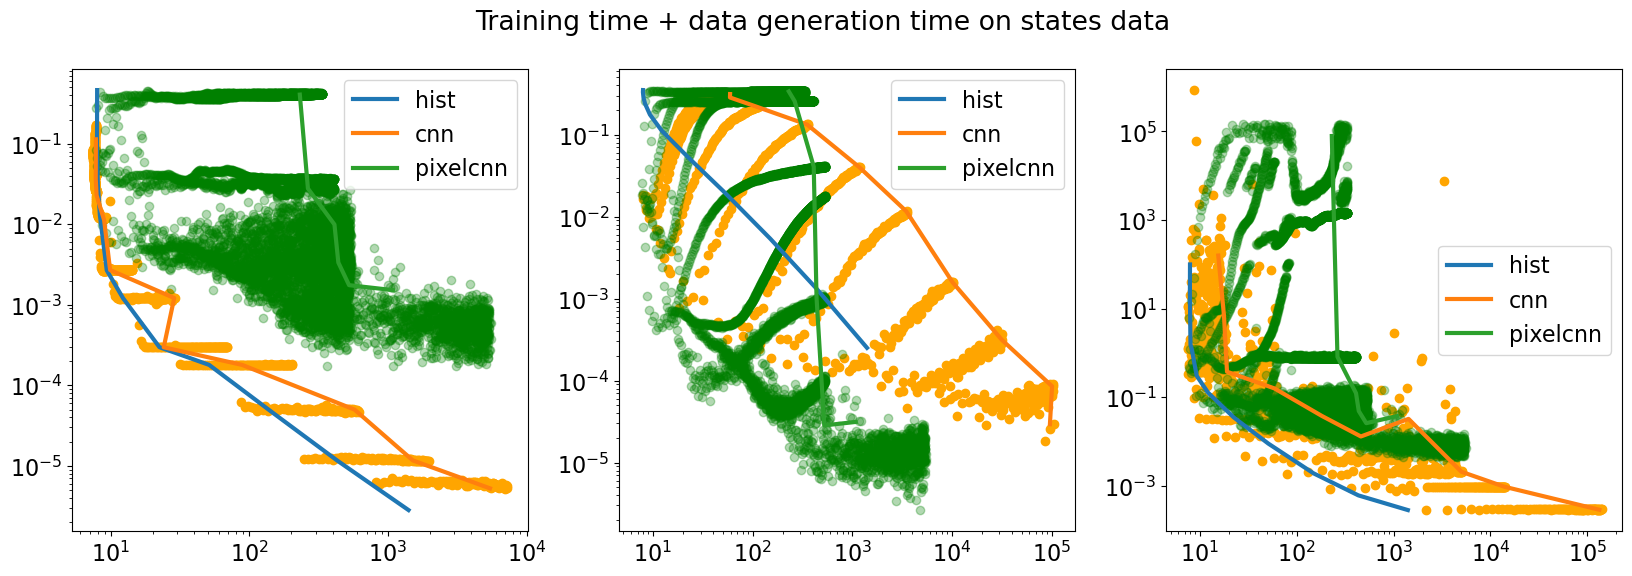

In [34]:
### state 
## ------------------params to modify-------------------------- ##
# -------------system----------------
L = 4 # length of the lattice
dim = 2 # dimension of the lattice

T_min, T_max = 0.1, 5.1
dT = 0.1
nt = 1 + np.int64(np.round(np.round((T_max-T_min) / dT)))
T = np.linspace(T_min, T_max, nt)
T = np.round(T, 2)

eqSteps = 10**5 # mixing time
mcSteps = 10**6 # MC steps = number of samples
sampling_interval = 10 # sampling interval

time_mcmc = np.load(f'../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/state/time.npy')

# -------------other params----------------
# epsilon = 1e-8 # epsilon for numerical stability
device = "cuda" if torch.cuda.is_available() else "cpu"

fig, axs= plt.subplots(1,3, figsize=(20,6))
fig.suptitle("Training time + data generation time on states data")
### SL
## HIST
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/state"
num_samples_list_hist = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
time_hist = np.zeros_like(num_samples_list_hist, dtype=np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy")

mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_SL_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_SL_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_SL_hist = np.load(hist_path_indicator)
        T_SL_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_SL, I_SL_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 100
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_SL_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_SL_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_SL_disc = np.load(disc_path_indicator)
        T_SL_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_SL, I_SL_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/SL_bestepoch.npy")
    times = np.load(f"../model/discrim/s/time/SL/time_numsamples={num_samples}_epochs=10.npy")
    time_disc[i] = (times / 10) * best_epoch

## GEN
mses_gen = []
mode = 'best'
num_samples_list_gen = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
epochs_list = [10**5, 10**5, 10**4, 10**3, 10**2, 10**1]
lr = 1e-3
for num_samples, epochs in zip(num_samples_list_gen, epochs_list):
    gen_path_indicator = f"./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_SL_numsamples={num_samples}.npy"
    if os.path.exists(gen_path_indicator):
        # print(f"loading: gen SL --- num_samples={num_samples}, epochs={epochs} --- ")
        I_SL_gen = np.load(gen_path_indicator)
        mses_gen.append([mse(I_SL, I_SL_gen)])
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = epochs_list[i]
    best_epoch = np.load(f'./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/numsamples={num_samples}_sum_best_epoch.npy')
    times = np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10 / 51) * best_epoch
  
axs[0].plot(time_hist+ time_mcmc * (np.array(num_samples_list_hist) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_hist, label = 'hist')
axs[0].plot(time_disc+ time_mcmc * (np.array(num_samples_list_disc) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_disc, label = 'cnn')

epochs = 100
for num_samples in num_samples_list_disc:
    mse_all_SL = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_SL.npy")
    axs[0].scatter(np.load(f"../model/discrim/s/time/SL/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_SL, (epochs,-1)), color = 'orange')

axs[0].plot(time_gen + time_mcmc * (np.array(num_samples_list_gen) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_gen, label = 'pixelcnn')

mode = 'all'
lr = 1e-3
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = int(1e7/num_samples) if num_samples > 10 else 10**5
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_SL = mse_all[0,:]
    axs[0].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_SL, (epochs,-1)), color = 'green', alpha = 0.3)

mode = 'all'
lr = 1e-4
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    if num_samples == 10:
        epochs = 10**5
    elif num_samples <= 10**4:
        epochs = int(1e7 / num_samples)
    else:
        epochs = int(1e8 / num_samples)
    # epochs = int(1e7/num_samples) if num_samples > 10 else 10**5
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_SL = mse_all[0,:]
    axs[0].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_SL, (epochs,-1)), color = 'green', alpha = 0.3)


axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()

### LBC
## HIST
mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_LBC_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_LBC_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_LBC_hist = np.load(hist_path_indicator)
        T_LBC_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_LBC, I_LBC_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs_list = [100,100,100,100,100,100,100,100,100,10]
lr=1e-3
for num_samples, epochs in zip(num_samples_list_disc, epochs_list):
    disc_path_indicator = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_LBC_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_LBC_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_LBC_disc = np.load(disc_path_indicator)
        T_LBC_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_LBC, I_LBC_disc)])

time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    epochs = epochs_list[i]
    best_epoch = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/LBC_bestepoch.npy")
    times = np.load(f"../model/discrim/s/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_disc[i] = (times / 10) * best_epoch * 51

## GEN
mses_gen = []
mode = 'best'
num_samples_list_gen = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
epochs_list = [10**5, 10**5, 10**4, 10**3, 10**2, 10**1]
lr = 1e-3
for num_samples, epochs in zip(num_samples_list_gen, epochs_list):
    gen_path_indicator = f"./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_LBC_numsamples={num_samples}.npy"
    if os.path.exists(gen_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_LBC_gen = np.load(gen_path_indicator)
        mses_gen.append([mse(I_LBC, I_LBC_gen)])
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = epochs_list[i]
    best_epoch = np.load(f'./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/numsamples={num_samples}_sum_best_epoch.npy')
    times = np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10 / 51) * best_epoch


axs[1].plot(time_hist+ time_mcmc * (np.array(num_samples_list_hist) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_hist, label = 'hist')
axs[1].plot(time_disc+ time_mcmc * (np.array(num_samples_list_disc) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_disc, label = 'cnn')

for num_samples in num_samples_list_disc:
    epochs = 100 if num_samples < 10**6 else 10
    mse_all_LBC = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_LBC.npy")
    axs[1].scatter(np.load(f"../model/discrim/s/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * 51 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_LBC, (epochs,-1)), color = 'orange')

axs[1].plot(time_gen + time_mcmc * (np.array(num_samples_list_gen) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_gen, label = 'pixelcnn')

mode = 'all'
lr = 1e-3
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = int(1e7/num_samples) if num_samples > 10 else 10**5
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_LBC = mse_all[1,:]
    axs[1].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_LBC, (epochs,-1)), color = 'green', alpha = 0.3)

mode = 'all'
lr = 1e-4
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    if num_samples == 10:
        epochs = 10**5
    elif num_samples <= 10**4:
        epochs = int(1e7 / num_samples)
    else:
        epochs = int(1e8 / num_samples)
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_LBC = mse_all[1,:]
    axs[1].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_LBC, (epochs,-1)), color = 'green', alpha = 0.3)


axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()

### PBM
## HIST
mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_PBM_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_PBM_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_PBM_hist = np.load(hist_path_indicator)
        T_PBM_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_PBM, I_PBM_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs_list = [100,100,100,100,100,100,100,100,100,100]
lr=1e-3
for num_samples, epochs in zip(num_samples_list_disc, epochs_list):
    disc_path_indicator = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_PBM_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_PBM_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_PBM_disc = np.load(disc_path_indicator)
        T_PBM_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_PBM, I_PBM_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/PBM_bestepoch.npy")
    times = np.load(f"../model/discrim/s/time/PBM/time_numsamples={num_samples}_epochs=10.npy")
    time_disc[i] = (times / 10) * best_epoch

## GEN
mses_gen = []
mode = 'best'
num_samples_list_gen = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
epochs_list = [10**5, 10**5, 10**4, 10**3, 10**2, 10**1]
lr = 1e-3
for num_samples, epochs in zip(num_samples_list_gen, epochs_list):
    gen_path_indicator = f"./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_PBM_numsamples={num_samples}.npy"
    if os.path.exists(gen_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_PBM_gen = np.load(gen_path_indicator)
        mses_gen.append([mse(I_PBM, I_PBM_gen)])
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = epochs_list[i]
    best_epoch = np.load(f'./gen/s/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/numsamples={num_samples}_sum_best_epoch.npy')
    times = np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10 / 51) * best_epoch

axs[2].plot(time_hist+ time_mcmc * (np.array(num_samples_list_hist) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_hist, label = 'hist')
axs[2].plot(time_disc+ time_mcmc * (np.array(num_samples_list_disc) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_disc, label = 'cnn')

epochs = 100
lr = 1e-3
for num_samples in num_samples_list_disc:
    # for num_samples in [10**1,]:
    mse_all_PBM = np.load(f"./disc/s/cnn/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_PBM.npy")
    axs[2].scatter(np.load(f"../model/discrim/s/time/PBM/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_PBM, (epochs,-1)), color = 'orange')

axs[2].plot(time_gen + time_mcmc * (np.array(num_samples_list_gen) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_gen, label = 'pixelcnn')


mode = 'all'
lr = 1e-3
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = int(1e7/num_samples) if num_samples > 10 else 10**5
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_PBM = mse_all[2,:]
    axs[2].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_PBM, (epochs,-1)), color = 'green', alpha = 0.3)

mode = 'all'
lr = 1e-4
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    if num_samples == 10:
        epochs = 10**5
    elif num_samples <= 10**4:
        epochs = int(1e7 / num_samples)
    else:
        epochs = int(1e8 / num_samples)
    # epochs = int(1e7/num_samples) if num_samples > 10 else 10**5
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_PBM = mse_all[2,:]
    axs[2].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_PBM, (epochs,-1)), color = 'green', alpha = 0.3)

axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()
plt.savefig('StateData_ErrorVsTime(with generation time).png')
plt.show()

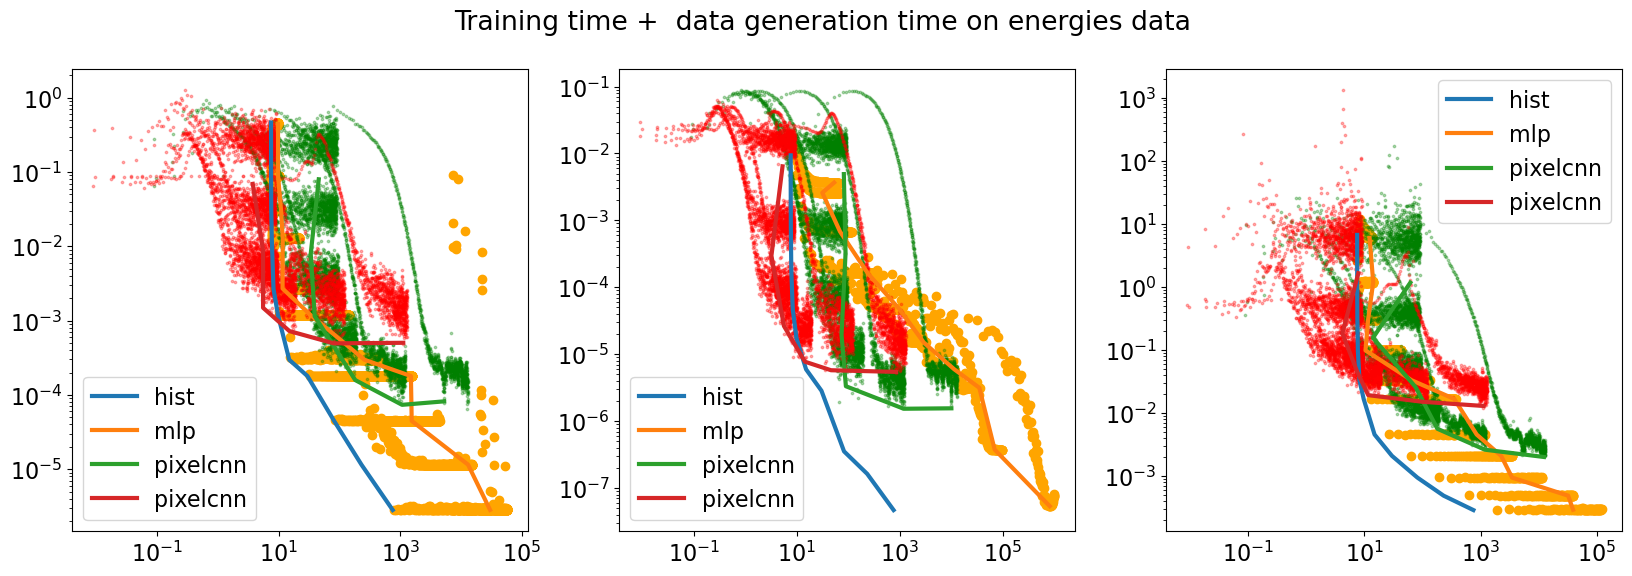

In [35]:
### energy 
## ------------------params to modify-------------------------- ##
# -------------system----------------
L = 4 # length of the lattice
dim = 2 # dimension of the lattice

T_min, T_max = 0.1, 5.1
dT = 0.1
nt = 1 + np.int64(np.round(np.round((T_max-T_min) / dT)))
T = np.linspace(T_min, T_max, nt)
T = np.round(T, 2)

eqSteps = 10**5 # mixing time
mcSteps = 10**6 # MC steps = number of samples
sampling_interval = 10 # sampling interval

time_mcmc = np.load(f'../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/state/time.npy')
# -------------other params----------------
# epsilon = 1e-8 # epsilon for numerical stability
device = "cuda" if torch.cuda.is_available() else "cpu"

fig, axs= plt.subplots(1,3, figsize=(20,6))
fig.suptitle("Training time +  data generation time on energies data")
### SL
## HIST
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/energy"
num_samples_list_hist = np.array([10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6])
time_hist = np.ones_like(num_samples_list_hist, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy")

mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_SL_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_SL_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_SL_hist = np.load(hist_path_indicator)
        T_SL_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_SL, I_SL_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 1000
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_SL_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_SL_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_SL_disc = np.load(disc_path_indicator)
        T_SL_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_SL, I_SL_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/SL_bestepoch.npy")
    times = np.load(f"../model/discrim/e/time/SL/time_numsamples={num_samples}_epochs=10.npy")
    time_disc[i] = (times / 10) * best_epoch

## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_SL_epochs=10000_ar=0.998.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_SL_epochs=10000_ar=0.998.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
    
axs[0].plot(time_hist + time_mcmc * (np.array(num_samples_list_hist) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_hist, label = 'hist')
axs[0].plot(time_disc + time_mcmc * (np.array(num_samples_list_disc) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_disc, label = 'mlp')

epochs = 1000
for num_samples in num_samples_list_disc:
    mse_all_SL = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_SL.npy")
    axs[0].scatter(np.load(f"../model/discrim/e/time/SL/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1)+ time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_SL, (epochs,-1)), color = 'orange')

axs[0].plot(time_gen, mses_gen, label = 'pixelcnn')
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_SL_epochs=1000_ar=0.98.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_SL_epochs=1000_ar=0.98.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
axs[0].plot(time_gen, mses_gen, label = 'pixelcnn')


mode = 'all'
epochs = 10000
ar = 0.998
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_SL = mse_all[0,:]
    axs[0].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'green', alpha = 0.3,s = 3)

mode = 'all'
epochs = 1000
ar = 0.98
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_SL = mse_all[0,:]
    axs[0].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'red', alpha = 0.3,s = 3)


axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()

### LBC
## HIST
mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_LBC_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_LBC_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_LBC_hist = np.load(hist_path_indicator)
        T_LBC_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_LBC, I_LBC_hist)])

## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs = 100
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_LBC_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_LBC_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_LBC_disc = np.load(disc_path_indicator)
        T_LBC_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_LBC, I_LBC_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/LBC_bestepoch.npy")
    times = np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_disc[i] = (times / 10) * best_epoch * 51

## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_LBC_epochs=10000_ar=0.998.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_LBC_epochs=10000_ar=0.998.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
    

axs[1].plot(time_hist + time_mcmc * (np.array(num_samples_list_hist) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_hist, label = 'hist')
axs[1].plot(time_disc + time_mcmc * (np.array(num_samples_list_disc) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_disc, label = 'mlp')

epochs = 100
for num_samples in num_samples_list_disc:
    mse_all_LBC = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_LBC.npy")
    axs[1].scatter(np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * 51 * np.arange(1,epochs+1)+ time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_LBC, (epochs,-1)), color = 'orange')


axs[1].plot(time_gen, mses_gen, label = 'pixelcnn')
## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_LBC_epochs=1000_ar=0.98.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_LBC_epochs=1000_ar=0.98.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
axs[1].plot(time_gen, mses_gen, label = 'pixelcnn')


mode = 'all'
epochs = 10000
ar = 0.998
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_LBC = mse_all[1,:]
    axs[1].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'green', alpha = 0.3,s = 3)

mode = 'all'
epochs = 1000
ar = 0.98
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_LBC = mse_all[1,:]
    axs[1].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'red', alpha = 0.3,s = 3)

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()


### PBM
## HIST
mses_hist = []
for num_samples in num_samples_list_hist:
    hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_PBM_numsamples={num_samples}.npy"
    hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_PBM_numsamples={num_samples}.npy"
    if os.path.exists(hist_path_indicator):
        I_PBM_hist = np.load(hist_path_indicator)
        T_PBM_hist = np.load(hist_path_t)
        mses_hist.append([mse(I_PBM, I_PBM_hist)])
## DISC
mode = 'best'
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 100
lr=1e-3
for num_samples in num_samples_list_disc:
    disc_path_indicator = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/I_PBM_numsamples={num_samples}.npy"
    disc_path_t = f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/T_PBM_numsamples={num_samples}.npy"
    if os.path.exists(disc_path_indicator):
        # print(f"loading: --- num_samples={num_samples}, epochs={epochs} --- ")
        I_PBM_disc = np.load(disc_path_indicator)
        T_PBM_disc = np.load(disc_path_t)
        mses_disc.append([mse(I_PBM, I_PBM_disc)])
time_disc = np.ones_like(num_samples_list_disc, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_disc):
    best_epoch = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/{mode}/PBM_bestepoch.npy")
    times = np.load(f"../model/discrim/e/time/PBM/time_numsamples={num_samples}_epochs=10.npy")
    time_disc[i] = (times / 10) * best_epoch

## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_PBM_epochs=10000_ar=0.998.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_PBM_epochs=10000_ar=0.998.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch

axs[2].plot(time_hist + time_mcmc * (np.array(num_samples_list_hist) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_hist, label = 'hist')
axs[2].plot(time_disc + time_mcmc * (np.array(num_samples_list_disc) * 10 + 1e5)/(10**6 * 10 + 1e5), mses_disc, label = 'mlp')


epochs = 100
for num_samples in num_samples_list_disc:
    mse_all_PBM = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_PBM.npy")
    axs[2].scatter(np.load(f"../model/discrim/e/time/PBM/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1)+ time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_PBM, (epochs,-1)), color = 'orange')

axs[2].plot(time_gen, mses_gen, label = 'pixelcnn')
## GEN
mode = 'best'
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
mses_gen = np.load(f'./gen/e/{mode}/mse_PBM_epochs=1000_ar=0.98.npy')
time_gen = np.ones_like(num_samples_list_gen, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_gen):
    best_epoch = np.load(f'./gen/e/best/epoch_PBM_epochs=1000_ar=0.98.npy')[i]
    times = np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")
    time_gen[i] = (times / 10) * best_epoch
axs[2].plot(time_gen, mses_gen, label = 'pixelcnn')

mode = 'all'
epochs = 10000
ar = 0.998
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_PBM = mse_all[2,:]
    axs[2].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'green', alpha = 0.3,s = 3)

mode = 'all'
epochs = 1000
ar = 0.98
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_PBM = mse_all[2,:]
    axs[2].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'red', alpha = 0.3,s = 3)

axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()

plt.savefig('EnergyData_ErrorVsTime(with generation time).png')
plt.show()

In [36]:
def envelope_interpolation(xx, yy, eps=1e-1):
    dy = np.diff(yy, prepend=0.0)
    corner_indices = np.where(dy < -1e-1)[0]
    corners_x = xx[corner_indices]
    corners_y = yy[corner_indices]
    f_interpolate = interp1d(corners_x, corners_y, kind='linear') 
    x_new = np.linspace(corners_x.min(), corners_x.max(), 100)
    y_new = f_interpolate(x_new)
    return x_new, y_new

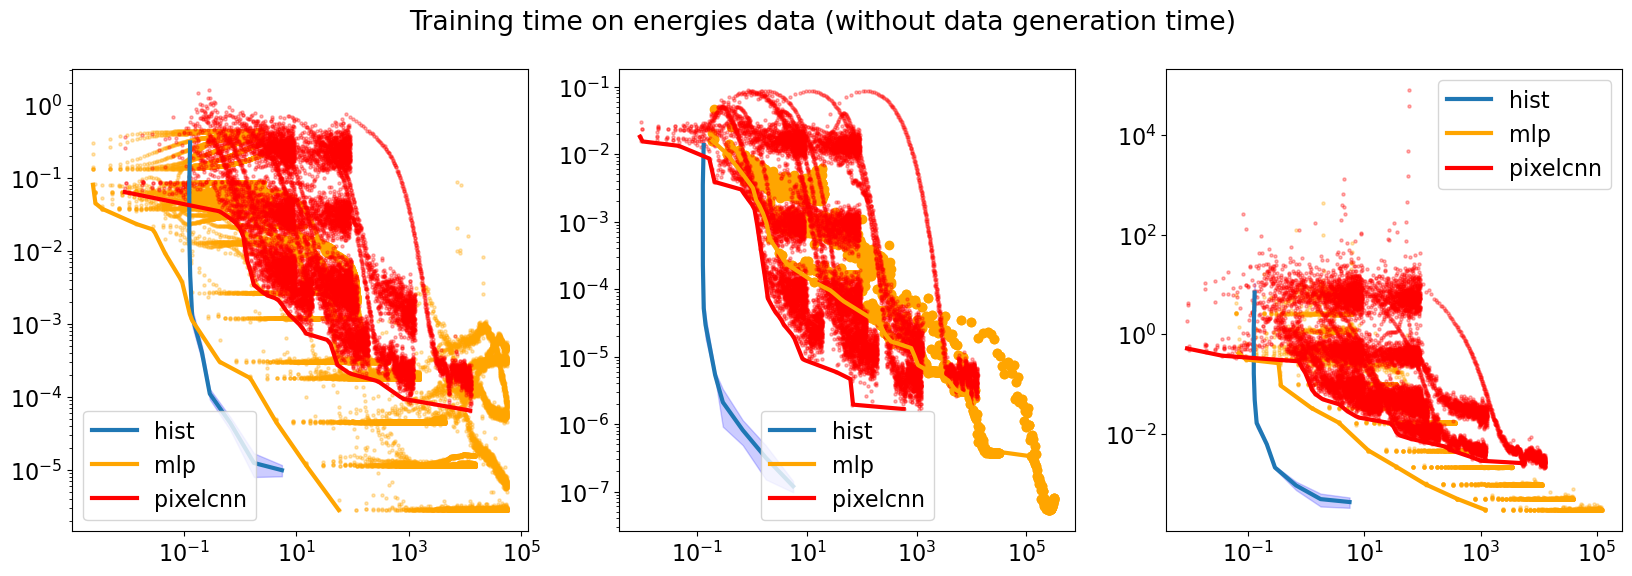

In [37]:
### energy 
## ------------------params to modify-------------------------- ##
# -------------system----------------
L = 4 # length of the lattice
dim = 2 # dimension of the lattice

T_min, T_max = 0.1, 5.1
dT = 0.1
nt = 1 + np.int64(np.round(np.round((T_max-T_min) / dT)))
T = np.linspace(T_min, T_max, nt)
T = np.round(T, 2)

eqSteps = 10**5 # mixing time
mcSteps = 10**6 # MC steps = number of samples
sampling_interval = 10 # sampling interval

# -------------other params----------------
# epsilon = 1e-8 # epsilon for numerical stability
device = "cuda" if torch.cuda.is_available() else "cpu"

fig, axs= plt.subplots(1,3, figsize=(20,6))
fig.suptitle("Training time on energies data (without data generation time)")

###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% SL %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###

##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  HIST %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/energy"
num_samples_list_hist = np.array([10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6])
time_hist = np.ones_like(num_samples_list_hist, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy")

mses_hist_all = np.zeros((5, 11))
for id in range(5):
    mses_hist = []
    for num_samples in num_samples_list_hist:
        hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_SL_numsamples={num_samples}_id={id}.npy"
        hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_SL_numsamples={num_samples}_id={id}.npy"
        if os.path.exists(hist_path_indicator):
            I_SL_hist = np.load(hist_path_indicator)
            T_SL_hist = np.load(hist_path_t)
            mses_hist.append([mse(I_SL, I_SL_hist)])
    mses_hist_all[id] = np.array(mses_hist).flatten()        

mean_values = mses_hist_all.mean(axis=0)
std_values = mses_hist_all.std(axis=0)

axs[0].plot(time_hist, mean_values, label='hist')
axs[0].fill_between(time_hist, mean_values - std_values, mean_values + std_values, color='b', alpha=0.2)

##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  DISC %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 1000

TIME = []
ERROR = []
for lr in [1e-2, 3e-3, 1e-3, 3e-4, 1e-4, 3e-5, 1e-5, 3e-6]:
    for num_samples in num_samples_list_disc:
        mse_all_SL = np.load(f"./disc/e/MLP/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_SL.npy")
        TIME.append(np.load(f"../model/discrim/e/time/SL/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1))
        ERROR.append(np.reshape(mse_all_SL, (epochs,-1)))
        axs[0].scatter(np.load(f"../model/discrim/e/time/SL/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'orange', alpha=0.3,s=5)

TIME_FLATTEN = np.array(TIME).flatten()
ERROR_FLATTEN = np.array(ERROR).flatten()
sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[0].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'orange', label='mlp')    

##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  GEN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
TIME = []
ERROR = []

mode = 'all'
epochs = 10000
ar = 0.998
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_SL = mse_all[0,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_SL, (epochs,-1)))
    axs[0].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)

epochs = 1000
ar = 0.98
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_SL = mse_all[0,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_SL, (epochs,-1)))
    axs[0].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)

epochs = 100
ar = 0.9
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_SL = mse_all[0,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_SL, (epochs,-1)))
    axs[0].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)


TIME_FLATTEN = np.concatenate(TIME)
ERROR_FLATTEN = np.concatenate(ERROR).flatten()
valid_indices = np.where(ERROR_FLATTEN != 0)[0]
TIME_FLATTEN = TIME_FLATTEN[valid_indices]
ERROR_FLATTEN = ERROR_FLATTEN[valid_indices]

sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[0].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'red', label='pixelcnn')    

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()



###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% LBC %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  HIST %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/energy"
num_samples_list_hist = np.array([10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6])
time_hist = np.ones_like(num_samples_list_hist, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy")

mses_hist_all = np.zeros((5, 11))
for id in range(5):
    mses_hist = []
    for num_samples in num_samples_list_hist:
        hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_LBC_numsamples={num_samples}_id={id}.npy"
        hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_LBC_numsamples={num_samples}_id={id}.npy"
        if os.path.exists(hist_path_indicator):
            I_LBC_hist = np.load(hist_path_indicator)
            T_LBC_hist = np.load(hist_path_t)
            mses_hist.append([mse(I_LBC, I_LBC_hist)])
    mses_hist_all[id] = np.array(mses_hist).flatten()        

mean_values = mses_hist_all.mean(axis=0)
std_values = mses_hist_all.std(axis=0)

axs[1].plot(time_hist, mean_values, label='hist')
axs[1].fill_between(time_hist, mean_values - std_values, mean_values + std_values, color='b', alpha=0.2)

##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  DISC %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs = 100
lr=1e-3

TIME = []
ERROR = []
for num_samples in num_samples_list_disc:
    mse_all_LBC = np.load(f"./disc/e/MLP/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_LBC.npy")
    TIME.append(np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10/3 * 50 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_LBC, (epochs,-1)))
    axs[1].scatter(np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10/3 * 50 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'orange')

num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3,]
lr=1e-2
TIME = []
ERROR = []
for num_samples in num_samples_list_disc:
    mse_all_LBC = np.load(f"./disc/e/MLP/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_LBC.npy")
    TIME.append(np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10/3 * 50 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_LBC, (epochs,-1)))
    axs[1].scatter(np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10/3 * 50 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'orange')

num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
lr=1e-3
TIME = []
ERROR = []
for num_samples in num_samples_list_disc:
    mse_all_LBC = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_LBC.npy")
    TIME.append(np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10/3 * 50 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_LBC, (epochs,-1)))
    axs[1].scatter(np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10/3 * 50 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'orange')

TIME_FLATTEN = np.array(TIME).flatten()
ERROR_FLATTEN = np.array(ERROR).flatten()
sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[1].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'orange', label='mlp')    

##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  GEN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
TIME = []
ERROR = []

mode = 'all'
epochs = 10000
ar = 0.998
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_LBC = mse_all[1,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_LBC, (epochs,-1)))
    axs[1].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)

epochs = 1000
ar = 0.98
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_LBC = mse_all[1,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_LBC, (epochs,-1)))
    axs[1].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)

epochs = 100
ar = 0.9
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_LBC = mse_all[1,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_LBC, (epochs,-1)))
    axs[1].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)


TIME_FLATTEN = np.concatenate(TIME)
ERROR_FLATTEN = np.concatenate(ERROR).flatten()
valid_indices = np.where(ERROR_FLATTEN != 0)[0]
TIME_FLATTEN = TIME_FLATTEN[valid_indices]
ERROR_FLATTEN = ERROR_FLATTEN[valid_indices]

sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[1].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'red', label='pixelcnn') 

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()


###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% PBM %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  HIST %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/energy"
num_samples_list_hist = np.array([10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6])
time_hist = np.ones_like(num_samples_list_hist, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy")

mses_hist_all = np.zeros((5, 11))
for id in range(5):
    mses_hist = []
    for num_samples in num_samples_list_hist:
        hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_PBM_numsamples={num_samples}_id={id}.npy"
        hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_PBM_numsamples={num_samples}_id={id}.npy"
        if os.path.exists(hist_path_indicator):
            I_PBM_hist = np.load(hist_path_indicator)
            T_PBM_hist = np.load(hist_path_t)
            mses_hist.append([mse(I_PBM, I_PBM_hist)])
    mses_hist_all[id] = np.array(mses_hist).flatten()        

mean_values = mses_hist_all.mean(axis=0)
std_values = mses_hist_all.std(axis=0)

axs[2].plot(time_hist, mean_values, label='hist')
axs[2].fill_between(time_hist, mean_values - std_values, mean_values + std_values, color='b', alpha=0.2)

##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  DISC %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 100

TIME = []
ERROR = []
for lr in [1e-2, 3e-3, 1e-3, 3e-4, 1e-4, 3e-5, 1e-5, 3e-6]:
    for num_samples in num_samples_list_disc:
        mse_all_PBM = np.load(f"./disc/e/MLP/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_PBM.npy")
        TIME.append(np.load(f"../model/discrim/e/time/PBM/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1))
        ERROR.append(np.reshape(mse_all_PBM, (epochs,-1)))
        axs[2].scatter(np.load(f"../model/discrim/e/time/PBM/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'orange', alpha=0.3,s=5)

TIME_FLATTEN = np.array(TIME).flatten()
ERROR_FLATTEN = np.array(ERROR).flatten()
sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[2].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'orange', label='mlp')    


##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  GEN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
TIME = []
ERROR = []

mode = 'all'
epochs = 10000
ar = 0.998
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_PBM = mse_all[2,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_PBM, (epochs,-1)))
    axs[2].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)

epochs = 1000
ar = 0.98
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_PBM = mse_all[2,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_PBM, (epochs,-1)))
    axs[2].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)

epochs = 100
ar = 0.9
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_PBM = mse_all[2,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_PBM, (epochs,-1)))
    axs[2].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)


TIME_FLATTEN = np.concatenate(TIME)
ERROR_FLATTEN = np.concatenate(ERROR).flatten()
valid_indices = np.where(ERROR_FLATTEN != 0)[0]
TIME_FLATTEN = TIME_FLATTEN[valid_indices]
ERROR_FLATTEN = ERROR_FLATTEN[valid_indices]

sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[2].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'red', label='pixelcnn')    



axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()

plt.show()

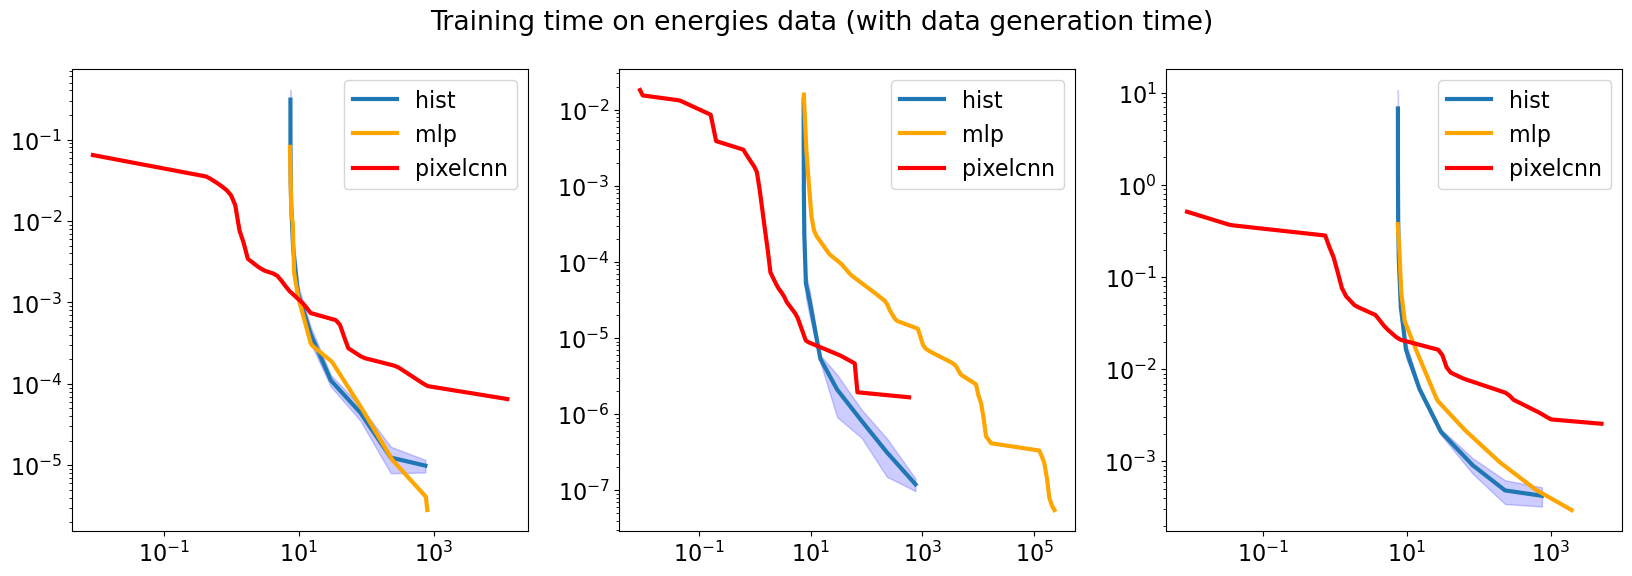

In [38]:
### energy 
## ------------------params to modify-------------------------- ##
# -------------system----------------
L = 4 # length of the lattice
dim = 2 # dimension of the lattice

T_min, T_max = 0.1, 5.1
dT = 0.1
nt = 1 + np.int64(np.round(np.round((T_max-T_min) / dT)))
T = np.linspace(T_min, T_max, nt)
T = np.round(T, 2)

eqSteps = 10**5 # mixing time
mcSteps = 10**6 # MC steps = number of samples
sampling_interval = 10 # sampling interval

## data generation time
time_mcmc = np.load(f'../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/state/time.npy')
# -------------other params----------------
# epsilon = 1e-8 # epsilon for numerical stability
device = "cuda" if torch.cuda.is_available() else "cpu"

fig, axs= plt.subplots(1,3, figsize=(20,6))
fig.suptitle("Training time on energies data (with data generation time)")

###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% SL %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###

##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  HIST %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/energy"
num_samples_list_hist = np.array([10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6])
time_hist = np.ones_like(num_samples_list_hist, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy") + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5)

mses_hist_all = np.zeros((5, 11))
for id in range(5):
    mses_hist = []
    for num_samples in num_samples_list_hist:
        hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_SL_numsamples={num_samples}_id={id}.npy"
        hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_SL_numsamples={num_samples}_id={id}.npy"
        if os.path.exists(hist_path_indicator):
            I_SL_hist = np.load(hist_path_indicator)
            T_SL_hist = np.load(hist_path_t)
            mses_hist.append([mse(I_SL, I_SL_hist)])
    mses_hist_all[id] = np.array(mses_hist).flatten()        

mean_values = mses_hist_all.mean(axis=0)
std_values = mses_hist_all.std(axis=0)

axs[0].plot(time_hist, mean_values, label='hist')
axs[0].fill_between(time_hist, mean_values - std_values, mean_values + std_values, color='b', alpha=0.2)

##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  DISC %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 1000

TIME = []
ERROR = []
for lr in [1e-2, 3e-3, 1e-3, 3e-4, 1e-4, 3e-5, 1e-5, 3e-6]:
    for num_samples in num_samples_list_disc:
        mse_all_SL = np.load(f"./disc/e/MLP/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_SL.npy")
        TIME.append(np.load(f"../model/discrim/e/time/SL/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5))
        ERROR.append(np.reshape(mse_all_SL, (epochs,-1)))
        # axs[0].scatter(np.load(f"../model/discrim/e/time/SL/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_SL, (epochs,-1)), color = 'orange', alpha=0.3,s=5)

TIME_FLATTEN = np.array(TIME).flatten()
ERROR_FLATTEN = np.array(ERROR).flatten()
sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[0].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'orange', label='mlp')    

##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  GEN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
TIME = []
ERROR = []

mode = 'all'
epochs = 10000
ar = 0.998
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_SL = mse_all[0,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_SL, (epochs,-1)))
    # axs[0].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)

epochs = 1000
ar = 0.98
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_SL = mse_all[0,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_SL, (epochs,-1)))
    # axs[0].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)

epochs = 100
ar = 0.9
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_SL = mse_all[0,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_SL, (epochs,-1)))
    # axs[0].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)


TIME_FLATTEN = np.concatenate(TIME)
ERROR_FLATTEN = np.concatenate(ERROR).flatten()
valid_indices = np.where(ERROR_FLATTEN != 0)[0]
TIME_FLATTEN = TIME_FLATTEN[valid_indices]
ERROR_FLATTEN = ERROR_FLATTEN[valid_indices]

sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[0].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'red', label='pixelcnn')    

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()



###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% LBC %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  HIST %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/energy"
num_samples_list_hist = np.array([10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6])
time_hist = np.ones_like(num_samples_list_hist, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy") + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5)

mses_hist_all = np.zeros((5, 11))
for id in range(5):
    mses_hist = []
    for num_samples in num_samples_list_hist:
        hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_LBC_numsamples={num_samples}_id={id}.npy"
        hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_LBC_numsamples={num_samples}_id={id}.npy"
        if os.path.exists(hist_path_indicator):
            I_LBC_hist = np.load(hist_path_indicator)
            T_LBC_hist = np.load(hist_path_t)
            mses_hist.append([mse(I_LBC, I_LBC_hist)])
    mses_hist_all[id] = np.array(mses_hist).flatten()        

mean_values = mses_hist_all.mean(axis=0)
std_values = mses_hist_all.std(axis=0)

axs[1].plot(time_hist, mean_values, label='hist')
axs[1].fill_between(time_hist, mean_values - std_values, mean_values + std_values, color='b', alpha=0.2)

##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  DISC %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs = 100
lr=1e-3

TIME = []
ERROR = []
for num_samples in num_samples_list_disc:
    mse_all_LBC = np.load(f"./disc/e/MLP/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_LBC.npy")
    TIME.append(np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10/3 * 50 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5))
    ERROR.append(np.reshape(mse_all_LBC, (epochs,-1)))
    # axs[1].scatter(np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10/3 * 50 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_LBC, (epochs,-1)), color = 'orange')

num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3,]
lr=1e-2
TIME = []
ERROR = []
for num_samples in num_samples_list_disc:
    mse_all_LBC = np.load(f"./disc/e/MLP/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_LBC.npy")
    TIME.append(np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10/3 * 50 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5))
    ERROR.append(np.reshape(mse_all_LBC, (epochs,-1)))
    # axs[1].scatter(np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10/3 * 50 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_LBC, (epochs,-1)), color = 'orange')

num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
lr=1e-3
TIME = []
ERROR = []
for num_samples in num_samples_list_disc:
    mse_all_LBC = np.load(f"./disc/e/mlp/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_LBC.npy")
    TIME.append(np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10/3 * 50 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5))
    ERROR.append(np.reshape(mse_all_LBC, (epochs,-1)))
    # axs[1].scatter(np.load(f"../model/discrim/e/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10/3 * 50 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_LBC, (epochs,-1)), color = 'orange')

TIME_FLATTEN = np.array(TIME).flatten()
ERROR_FLATTEN = np.array(ERROR).flatten()
sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[1].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'orange', label='mlp')    

##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  GEN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
TIME = []
ERROR = []

mode = 'all'
epochs = 10000
ar = 0.998
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_LBC = mse_all[1,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_LBC, (epochs,-1)))
    # axs[1].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)

epochs = 1000
ar = 0.98
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_LBC = mse_all[1,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_LBC, (epochs,-1)))
    # axs[1].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)

epochs = 100
ar = 0.9
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_LBC = mse_all[1,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_LBC, (epochs,-1)))
    # axs[1].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)


TIME_FLATTEN = np.concatenate(TIME)
ERROR_FLATTEN = np.concatenate(ERROR).flatten()
valid_indices = np.where(ERROR_FLATTEN != 0)[0]
TIME_FLATTEN = TIME_FLATTEN[valid_indices]
ERROR_FLATTEN = ERROR_FLATTEN[valid_indices]

sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[1].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'red', label='pixelcnn') 

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()


###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% PBM %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  HIST %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/energy"
num_samples_list_hist = np.array([10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6])
time_hist = np.ones_like(num_samples_list_hist, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy") + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5)

mses_hist_all = np.zeros((5, 11))
for id in range(5):
    mses_hist = []
    for num_samples in num_samples_list_hist:
        hist_path_indicator = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/I_PBM_numsamples={num_samples}_id={id}.npy"
        hist_path_t = f"./hist/e/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/T_PBM_numsamples={num_samples}_id={id}.npy"
        if os.path.exists(hist_path_indicator):
            I_PBM_hist = np.load(hist_path_indicator)
            T_PBM_hist = np.load(hist_path_t)
            mses_hist.append([mse(I_PBM, I_PBM_hist)])
    mses_hist_all[id] = np.array(mses_hist).flatten()        

mean_values = mses_hist_all.mean(axis=0)
std_values = mses_hist_all.std(axis=0)

axs[2].plot(time_hist, mean_values, label='hist')
axs[2].fill_between(time_hist, mean_values - std_values, mean_values + std_values, color='b', alpha=0.2)

##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  DISC %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 100

TIME = []
ERROR = []
for lr in [1e-2, 3e-3, 1e-3, 3e-4, 1e-4, 3e-5, 1e-5, 3e-6]:
    for num_samples in num_samples_list_disc:
        mse_all_PBM = np.load(f"./disc/e/MLP/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_PBM.npy")
        TIME.append(np.load(f"../model/discrim/e/time/PBM/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5))
        ERROR.append(np.reshape(mse_all_PBM, (epochs,-1)))
        # axs[2].scatter(np.load(f"../model/discrim/e/time/PBM/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1) + time_mcmc * (num_samples * 10 + 1e5)/(10**6 * 10 + 1e5), np.reshape(mse_all_PBM, (epochs,-1)), color = 'orange', alpha=0.3,s=5)

TIME_FLATTEN = np.array(TIME).flatten()
ERROR_FLATTEN = np.array(ERROR).flatten()
sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[2].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'orange', label='mlp')    


##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  GEN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
TIME = []
ERROR = []

mode = 'all'
epochs = 10000
ar = 0.998
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_PBM = mse_all[2,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_PBM, (epochs,-1)))
    # axs[2].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)

epochs = 1000
ar = 0.98
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_PBM = mse_all[2,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_PBM, (epochs,-1)))
    # axs[2].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)

epochs = 100
ar = 0.9
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    mse_all = np.load(f'./gen/e/all/mse_all_numsamples={num_samples}_epochs={epochs}_ar={ar}.npy')
    mse_all_PBM = mse_all[2,:]
    TIME.append(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_PBM, (epochs,-1)))
    # axs[2].scatter(np.load(f"../model/gen/time/RKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'red', alpha = 0.3,s = 5)


TIME_FLATTEN = np.concatenate(TIME)
ERROR_FLATTEN = np.concatenate(ERROR).flatten()
valid_indices = np.where(ERROR_FLATTEN != 0)[0]
TIME_FLATTEN = TIME_FLATTEN[valid_indices]
ERROR_FLATTEN = ERROR_FLATTEN[valid_indices]

sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[2].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'red', label='pixelcnn')    



axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()

plt.show()

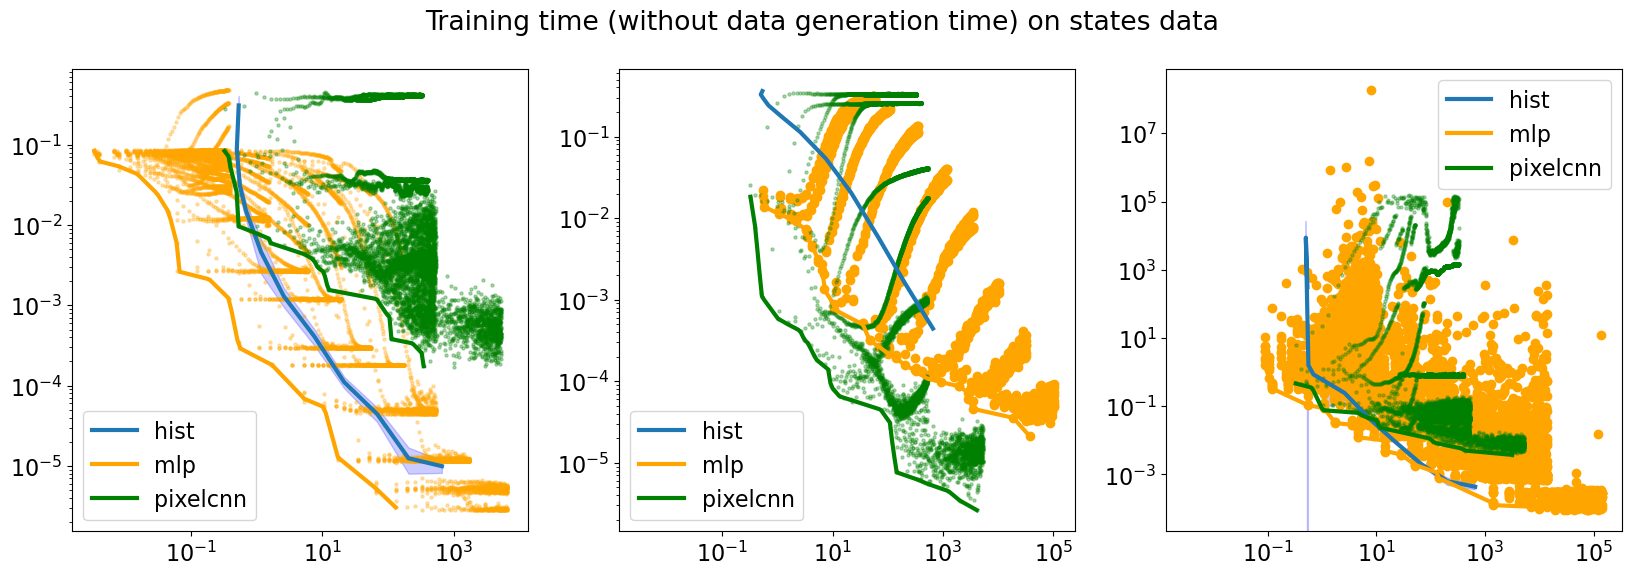

In [39]:
### state 
## ------------------params to modify-------------------------- ##
# -------------system----------------
L = 4 # length of the lattice
dim = 2 # dimension of the lattice

T_min, T_max = 0.1, 5.1
dT = 0.1
nt = 1 + np.int64(np.round(np.round((T_max-T_min) / dT)))
T = np.linspace(T_min, T_max, nt)
T = np.round(T, 2)

eqSteps = 10**5 # mixing time
mcSteps = 10**6 # MC steps = number of samples
sampling_interval = 10 # sampling interval

# -------------other params----------------
# epsilon = 1e-8 # epsilon for numerical stability
device = "cuda" if torch.cuda.is_available() else "cpu"

fig, axs= plt.subplots(1,3, figsize=(20,6))
fig.suptitle("Training time (without data generation time) on states data")
###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% SL %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  HIST %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/state"
num_samples_list_hist = np.array([10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6])
time_hist = np.ones_like(num_samples_list_hist, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy")

mses_hist_all = np.zeros((5, 11))
for id in range(5):
    mses_hist = []
    for num_samples in num_samples_list_hist:
        hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_SL_numsamples={num_samples}_id={id}.npy"
        hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_SL_numsamples={num_samples}_id={id}.npy"
        if os.path.exists(hist_path_indicator):
            I_SL_hist = np.load(hist_path_indicator)
            T_SL_hist = np.load(hist_path_t)
            mses_hist.append([mse(I_SL, I_SL_hist)])
    mses_hist_all[id] = np.array(mses_hist).flatten()        

mean_values = mses_hist_all.mean(axis=0)
std_values = mses_hist_all.std(axis=0)

axs[0].plot(time_hist, mean_values, label='hist')
axs[0].fill_between(time_hist, mean_values - std_values, mean_values + std_values, color='b', alpha=0.2)


##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  DISC %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
mses_disc = []
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6]
epochs = 100

TIME = []
ERROR = []
for lr in [1e-2, 3e-3, 1e-3, 3e-4, 1e-4, 3e-5, 1e-5, 3e-6]:
    for num_samples in num_samples_list_disc:
        mse_all_SL = np.load(f"./disc/s/CNN/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_SL.npy")
        TIME.append(np.load(f"../model/discrim/s/time/SL/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1))
        ERROR.append(np.reshape(mse_all_SL, (epochs,-1)))
        axs[0].scatter(np.load(f"../model/discrim/s/time/SL/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'orange', alpha=0.3,s=5)

TIME_FLATTEN = np.array(TIME).flatten()
ERROR_FLATTEN = np.array(ERROR).flatten()
sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[0].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'orange', label='mlp')    



##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  GEN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
TIME = []
ERROR = []

mode = 'all'
lr = 1e-3
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = int(1e7/num_samples) if num_samples > 10 else 10**5
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_SL = mse_all[0,:]
    TIME.append(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_SL, (epochs,-1)))
    axs[0].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'green', alpha = 0.3,s=5)

lr = 1e-4
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    if num_samples == 10:
        epochs = 10**5
    elif num_samples <= 10**4:
        epochs = int(1e7 / num_samples)
    else:
        epochs = int(1e8 / num_samples)
    # epochs = int(1e7/num_samples) if num_samples > 10 else 10**5
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_SL = mse_all[0,:]
    TIME.append(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_SL, (epochs,-1)))
    axs[0].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_SL, (epochs,-1)), color = 'green', alpha = 0.3, s=5)

TIME_FLATTEN = np.concatenate(TIME)
ERROR_FLATTEN = np.concatenate(ERROR).flatten()
valid_indices = np.where(ERROR_FLATTEN != 0)[0]
TIME_FLATTEN = TIME_FLATTEN[valid_indices]
ERROR_FLATTEN = ERROR_FLATTEN[valid_indices]

sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[0].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'green', label='pixelcnn') 



axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()



###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% LBC %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  HIST %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/state"
num_samples_list_hist = np.array([10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6])
time_hist = np.ones_like(num_samples_list_hist, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy")

mses_hist_all = np.zeros((5, 11))
for id in range(5):
    mses_hist = []
    for num_samples in num_samples_list_hist:
        hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_LBC_numsamples={num_samples}_id={id}.npy"
        hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_LBC_numsamples={num_samples}_id={id}.npy"
        if os.path.exists(hist_path_indicator):
            I_LBC_hist = np.load(hist_path_indicator)
            T_LBC_hist = np.load(hist_path_t)
            mses_hist.append([mse(I_LBC, I_LBC_hist)])
    mses_hist_all[id] = np.array(mses_hist).flatten()        

mean_values = mses_hist_all.mean(axis=0)
std_values = mses_hist_all.std(axis=0)

axs[1].plot(time_hist, mean_values, label='hist')
axs[1].fill_between(time_hist, mean_values - std_values, mean_values + std_values, color='b', alpha=0.2)

##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  DISC %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
TIME = []
ERROR = []

num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5]
lrs = [1e-2, 1e-3]
epochs = 100
for lr in lrs:
    for num_samples in num_samples_list_disc:
        mse_all_LBC = np.load(f"./disc/s/CNN/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_LBC.npy")
        TIME.append(np.load(f"../model/discrim/s/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * 51 * np.arange(1,epochs+1))
        ERROR.append(np.reshape(mse_all_LBC, (epochs,-1)))
        axs[1].scatter(np.load(f"../model/discrim/s/time/LBC/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * 51 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'orange')

TIME_FLATTEN = np.array(TIME).flatten()
ERROR_FLATTEN = np.array(ERROR).flatten()
sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[1].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'orange', label='mlp')    

##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  GEN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
TIME = []
ERROR = []

mode = 'all'
lr = 1e-3
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = int(1e7/num_samples) if num_samples > 10 else 10**5
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_LBC = mse_all[1,:]
    TIME.append(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_LBC, (epochs,-1)))
    axs[1].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'green', alpha = 0.3,s=5)

lr = 1e-4
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    if num_samples == 10:
        epochs = 10**5
    elif num_samples <= 10**4:
        epochs = int(1e7 / num_samples)
    else:
        epochs = int(1e8 / num_samples)
    # epochs = int(1e7/num_samples) if num_samples > 10 else 10**5
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_LBC = mse_all[1,:]
    TIME.append(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_LBC, (epochs,-1)))
    axs[1].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_LBC, (epochs,-1)), color = 'green', alpha = 0.3, s=5)

TIME_FLATTEN = np.concatenate(TIME)
ERROR_FLATTEN = np.concatenate(ERROR).flatten()
valid_indices = np.where(ERROR_FLATTEN != 0)[0]
TIME_FLATTEN = TIME_FLATTEN[valid_indices]
ERROR_FLATTEN = ERROR_FLATTEN[valid_indices]

sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[1].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'green', label='pixelcnn') 


axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()


###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% PBM %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  HIST %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
hist_folder = f"../data/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/state"
num_samples_list_hist = np.array([10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 3*10**5, 10**6])
time_hist = np.ones_like(num_samples_list_hist, dtype = np.float64)
for i, num_samples in enumerate(num_samples_list_hist):
    time_hist[i] = np.load(f"{hist_folder}/numsamples={num_samples}/time.npy")

mses_hist_all = np.zeros((5, 11))
for id in range(5):
    mses_hist = []
    for num_samples in num_samples_list_hist:
        hist_path_indicator = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RI_PBM_numsamples={num_samples}_id={id}.npy"
        hist_path_t = f"./hist/s/L={L}_Tmin={np.round(T_min,1)}_Tmax={np.round(T_max,1)}_eqSteps={eqSteps}_mcSteps={mcSteps}_interval={sampling_interval}/RT_PBM_numsamples={num_samples}_id={id}.npy"
        if os.path.exists(hist_path_indicator):
            I_PBM_hist = np.load(hist_path_indicator)
            T_PBM_hist = np.load(hist_path_t)
            mses_hist.append([mse(I_PBM, I_PBM_hist)])
    mses_hist_all[id] = np.array(mses_hist).flatten()        

mean_values = mses_hist_all.mean(axis=0)
std_values = mses_hist_all.std(axis=0)

axs[2].plot(time_hist, mean_values, label='hist')
axs[2].fill_between(time_hist, mean_values - std_values, mean_values + std_values, color='b', alpha=0.2)

##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  DISC %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
TIME = []
ERROR = []

lrs = [1e-2, 3e-3, 1e-3, 3e-4, 1e-4, 3e-5, 1e-5, 3e-6]
num_samples_list_disc = [10**1, 3*10**1, 10**2, 3*10**2, 10**3, 3*10**3, 10**4, 3*10**4, 10**5, 10**6]
epochs = 100
for lr in lrs:
    for num_samples in num_samples_list_disc:
        mse_all_PBM = np.load(f"./disc/s/CNN/numsample={num_samples}_lr={lr}_epochs={epochs}/all/mse_all_PBM.npy")
        TIME.append(np.load(f"../model/discrim/s/time/PBM/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1))
        ERROR.append(np.reshape(mse_all_PBM, (epochs,-1)))
        axs[2].scatter(np.load(f"../model/discrim/s/time/PBM/time_numsamples={num_samples}_epochs=10.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'orange')

TIME_FLATTEN = np.array(TIME).flatten()
ERROR_FLATTEN = np.array(ERROR).flatten()
sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[2].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'orange', label='mlp')    


##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  GEN %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##
TIME = []
ERROR = []

mode = 'all'
lr = 1e-3
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    epochs = int(1e7/num_samples) if num_samples > 10 else 10**5
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_PBM = mse_all[2,:]
    TIME.append(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_PBM, (epochs,-1)))
    axs[2].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'green', alpha = 0.3,s=5)

lr = 1e-4
num_samples_list_gen = [10,100,1000,10000,100000,1000_000]
for i, num_samples in enumerate(num_samples_list_gen):
    if num_samples == 10:
        epochs = 10**5
    elif num_samples <= 10**4:
        epochs = int(1e7 / num_samples)
    else:
        epochs = int(1e8 / num_samples)
    # epochs = int(1e7/num_samples) if num_samples > 10 else 10**5
    mse_all = np.load(f'./gen/s/all/mse_all_numsamples={num_samples}_epochs={epochs}_lr={lr}.npy')
    mse_all_PBM = mse_all[2,:]
    TIME.append(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1))
    ERROR.append(np.reshape(mse_all_PBM, (epochs,-1)))
    axs[2].scatter(np.load(f"../model/gen/time/FKL/time_numsamples={num_samples}_epochs=10_id=2.npy")/10 * np.arange(1,epochs+1), np.reshape(mse_all_PBM, (epochs,-1)), color = 'green', alpha = 0.3, s=5)

TIME_FLATTEN = np.concatenate(TIME)
ERROR_FLATTEN = np.concatenate(ERROR).flatten()
valid_indices = np.where(ERROR_FLATTEN != 0)[0]
TIME_FLATTEN = TIME_FLATTEN[valid_indices]
ERROR_FLATTEN = ERROR_FLATTEN[valid_indices]

sorted_indices = np.argsort(TIME_FLATTEN)
TIME_FLATTEN_sorted = TIME_FLATTEN[sorted_indices]
ERROR_FLATTEN_sorted = ERROR_FLATTEN[sorted_indices]
TIME_FLATTEN_INTERP_log, ERROR_FLATTEN_INTERP_log = envelope_interpolation(np.log(TIME_FLATTEN_sorted), np.minimum.accumulate(np.log(ERROR_FLATTEN_sorted)))
TIME_FLATTEN_INTERP = np.exp(TIME_FLATTEN_INTERP_log)
ERROR_FLATTEN_INTERP = np.exp(ERROR_FLATTEN_INTERP_log)

axs[2].plot(TIME_FLATTEN_INTERP, ERROR_FLATTEN_INTERP, color = 'green', label='pixelcnn') 

axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()

plt.show()
